In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans

# Importing the clients dataset

In [3]:
data = pd.read_csv(r'C:\Users\ASUS\Downloads\CLIENT.csv',sep=';' , index_col=False, dtype='unicode')

In [4]:
pd.set_option("display.max.columns", None)

# Exploratory Data Analysis (EDA)


In [5]:
data.head()

,CLIENT_ID,AGENCE,MARCHE,SEGMENT,SOUS SEGMENT,CLIENT_AGE,CLIENT_ACTIVITE,CLIENT_ENCOURS_A_VUE,CLIENT_ENCOURS_ENGAGEMENT,CLIENT_ENROLES,CLIENT_ENTREE_FINAL,CLIENT_MMM,CLIENT_NOMBRE_BIATNET,CLIENT_NOMBRE_CARTES,CLIENT_NOMBRE_MESSAGIS,CLIENT_NOMBRE_FAMILIA,CLIENT_NOMBRE_OPCVM,CLIENT_NOMBRE_PACK_BABY,CLIENT_NOMBRE_PACK_BUSINESS,CLIENT_NOMBRE_PACK_ELITE,CLIENT_NOMBRE_PACK_ELITE_PRO,CLIENT_NOMBRE_PACK_EPARGNE,CLIENT_NOMBRE_PACK_EXPRESS,CLIENT_NOMBRE_PACK_FIRST,CLIENT_NOMBRE_PACK_NAJAH,CLIENT_NOMBRE_PACK_PLATI_PRO,CLIENT_NOMBRE_PACK_PLATIN,CLIENT_NOMBRE_PACK_SAFIR,CLIENT_NOMBRE_PACK_SAFIR_PRO,CLIENT_NOMBRE_PACK_SILVER,CLIENT_NOMBRE_PACK_TOUN,CLIENT_NOMBRE_PACK_TOUN_DVS,CLIENT_NOMBRE_PACK_UNIV,CLIENT_NOMBRE_PROJET_AVENIR,CLIENT_NOMBRE_TITRES,CLIENT_PROFESSION,CLIENT_REVENUS_MENSUELS_NETS,CLIENT_TYPE_DEPOSANT,CLIENT_VRD_MOY,VALEUR
0,178601,A1,PART,CLASSE MOYENNE,1 CM - SALARIÉ,51,Activites juridiques,0,"27713,798",FALSE,AUTRE,"916,666",1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,Directeurs d'entreprises,900,CLIENT_A_VUE,0,1
1,98070,A1,PART,CLASSE MOYENNE,1 CM - SALARIÉ,58,Autres activites manufacturieres n.c.a.,0,"84,396",NON,AUTRE,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,Directeurs d'entreprises,NaN,CLIENT_A_VUE,0,1
2,454569,A1,PART,CLASSE MOYENNE,1 CM - SALARIÉ,57,Coiffure et soins de beaute,"3013,95","849,304",NON,AUTRE,"1252,316",0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,Directeurs d'Ã©tablissements d'enseignement et...,538,CLIENT_A_VUE,"2933,30905",1
3,40717,A1,PART,CLASSE MOYENNE,1 CM - SALARIÉ,52,Commerce de detail de tabac,0,"783,062",NON,AUTRE,"1748,31",0,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,Magistrats,NaN,CLIENT_A_VUE,"349,79515",1
4,442731,A1,PART,CLASSE MOYENNE,1 CM - SALARIÉ,58,Commerce de gros d'equipements pour la constru...,"631,94",0,NON,AUTRE,"216,331",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Magistrats,NaN,CLIENT_A_VUE,"1373,05",1


In [6]:
data.tail()

,CLIENT_ID,AGENCE,MARCHE,SEGMENT,SOUS SEGMENT,CLIENT_AGE,CLIENT_ACTIVITE,CLIENT_ENCOURS_A_VUE,CLIENT_ENCOURS_ENGAGEMENT,CLIENT_ENROLES,CLIENT_ENTREE_FINAL,CLIENT_MMM,CLIENT_NOMBRE_BIATNET,CLIENT_NOMBRE_CARTES,CLIENT_NOMBRE_MESSAGIS,CLIENT_NOMBRE_FAMILIA,CLIENT_NOMBRE_OPCVM,CLIENT_NOMBRE_PACK_BABY,CLIENT_NOMBRE_PACK_BUSINESS,CLIENT_NOMBRE_PACK_ELITE,CLIENT_NOMBRE_PACK_ELITE_PRO,CLIENT_NOMBRE_PACK_EPARGNE,CLIENT_NOMBRE_PACK_EXPRESS,CLIENT_NOMBRE_PACK_FIRST,CLIENT_NOMBRE_PACK_NAJAH,CLIENT_NOMBRE_PACK_PLATI_PRO,CLIENT_NOMBRE_PACK_PLATIN,CLIENT_NOMBRE_PACK_SAFIR,CLIENT_NOMBRE_PACK_SAFIR_PRO,CLIENT_NOMBRE_PACK_SILVER,CLIENT_NOMBRE_PACK_TOUN,CLIENT_NOMBRE_PACK_TOUN_DVS,CLIENT_NOMBRE_PACK_UNIV,CLIENT_NOMBRE_PROJET_AVENIR,CLIENT_NOMBRE_TITRES,CLIENT_PROFESSION,CLIENT_REVENUS_MENSUELS_NETS,CLIENT_TYPE_DEPOSANT,CLIENT_VRD_MOY,VALEUR
834748,907048,NaN,PRO,HAUT DE GAMME,4 AFFLUENT,39,Transports maritimes,0,0,FALSE,AUTRE,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Conducteurs dans le transport de marchandises,1000,CLIENT_EXCLUSIF_EPARGNE,"68,2356",1
834749,220819,NaN,PRO,HAUT DE GAMME,4 AFFLUENT,51,Transports maritimes,0,0,NON,AUTRE,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,CommerÃ§ants (autres),2000,CLIENT_PLACEUR,"1036,8706047608",1
834750,292399,NaN,PRO,HAUT DE GAMME,4 AFFLUENT,45,Transports maritimes,0,0,NON,AUTRE,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Artisans (autres),1500,CLIENT_EXCLUSIF_EPARGNE,"1724,58635",1
834751,607524,NaN,PRO,HAUT DE GAMME,4 AFFLUENT,38,Transports maritimes,0,"284,391",FALSE,AUTRE,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Conducteurs dans le transport de marchandises,1200,CLIENT_A_VUE,"17,43685",1
834752,401767,NaN,PRO,HAUT DE GAMME,4 AFFLUENT,42,Transports maritimes,0,"617,537",FALSE,AUTRE,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Chauffeurs de taxis et conducteurs d'automobil...,4000,CLIENT_A_VUE,"1495,50345",1


In [7]:
data.shape

(834753, 40)

In [8]:
data.columns

Index(['CLIENT_ID', 'AGENCE', 'MARCHE', 'SEGMENT', 'SOUS SEGMENT',
       'CLIENT_AGE', 'CLIENT_ACTIVITE', 'CLIENT_ENCOURS_A_VUE',
       'CLIENT_ENCOURS_ENGAGEMENT', 'CLIENT_ENROLES', 'CLIENT_ENTREE_FINAL',
       'CLIENT_MMM', 'CLIENT_NOMBRE_BIATNET', 'CLIENT_NOMBRE_CARTES',
       'CLIENT_NOMBRE_MESSAGIS', 'CLIENT_NOMBRE_FAMILIA',
       'CLIENT_NOMBRE_OPCVM', 'CLIENT_NOMBRE_PACK_BABY',
       'CLIENT_NOMBRE_PACK_BUSINESS', 'CLIENT_NOMBRE_PACK_ELITE',
       'CLIENT_NOMBRE_PACK_ELITE_PRO', 'CLIENT_NOMBRE_PACK_EPARGNE',
       'CLIENT_NOMBRE_PACK_EXPRESS', 'CLIENT_NOMBRE_PACK_FIRST',
       'CLIENT_NOMBRE_PACK_NAJAH', 'CLIENT_NOMBRE_PACK_PLATI_PRO',
       'CLIENT_NOMBRE_PACK_PLATIN', 'CLIENT_NOMBRE_PACK_SAFIR',
       'CLIENT_NOMBRE_PACK_SAFIR_PRO', 'CLIENT_NOMBRE_PACK_SILVER',
       'CLIENT_NOMBRE_PACK_TOUN', 'CLIENT_NOMBRE_PACK_TOUN_DVS',
       'CLIENT_NOMBRE_PACK_UNIV', 'CLIENT_NOMBRE_PROJET_AVENIR',
       'CLIENT_NOMBRE_TITRES', 'CLIENT_PROFESSION',
       'CLIENT_REVENUS_MEN

In [9]:
data.nunique()

CLIENT_ID                       834753
AGENCE                             204
MARCHE                               2
SEGMENT                              8
SOUS SEGMENT                        21
CLIENT_AGE                         130
CLIENT_ACTIVITE                    495
CLIENT_ENCOURS_A_VUE            178887
CLIENT_ENCOURS_ENGAGEMENT       196759
CLIENT_ENROLES                       3
CLIENT_ENTREE_FINAL                  2
CLIENT_MMM                      265249
CLIENT_NOMBRE_BIATNET                4
CLIENT_NOMBRE_CARTES                13
CLIENT_NOMBRE_MESSAGIS               5
CLIENT_NOMBRE_FAMILIA                1
CLIENT_NOMBRE_OPCVM                  6
CLIENT_NOMBRE_PACK_BABY              2
CLIENT_NOMBRE_PACK_BUSINESS          1
CLIENT_NOMBRE_PACK_ELITE             2
CLIENT_NOMBRE_PACK_ELITE_PRO         3
CLIENT_NOMBRE_PACK_EPARGNE           5
CLIENT_NOMBRE_PACK_EXPRESS           2
CLIENT_NOMBRE_PACK_FIRST             2
CLIENT_NOMBRE_PACK_NAJAH             2
CLIENT_NOMBRE_PACK_PLATI_

In [10]:
data.describe().T

,count,unique,top,freq
CLIENT_ID,834753,834753,178601,1
AGENCE,818215,204,61,12192
MARCHE,834753,2,PART,752484
SEGMENT,834752,8,GRAND PUBLIC,307473
SOUS SEGMENT,834752,21,2 GP - ÉPARGNANT,227001
CLIENT_AGE,834458,130,30,23163
CLIENT_ACTIVITE,834753,495,N_D,777000
CLIENT_ENCOURS_A_VUE,834753,178887,0,647655
CLIENT_ENCOURS_ENGAGEMENT,834753,196759,0,615813
CLIENT_ENROLES,834753,3,NON,721960


### Checking missing values

In [11]:
data.isnull().any()

CLIENT_ID                       False
AGENCE                           True
MARCHE                          False
SEGMENT                          True
SOUS SEGMENT                     True
CLIENT_AGE                       True
CLIENT_ACTIVITE                 False
CLIENT_ENCOURS_A_VUE            False
CLIENT_ENCOURS_ENGAGEMENT       False
CLIENT_ENROLES                  False
CLIENT_ENTREE_FINAL             False
CLIENT_MMM                      False
CLIENT_NOMBRE_BIATNET           False
CLIENT_NOMBRE_CARTES            False
CLIENT_NOMBRE_MESSAGIS          False
CLIENT_NOMBRE_FAMILIA           False
CLIENT_NOMBRE_OPCVM             False
CLIENT_NOMBRE_PACK_BABY         False
CLIENT_NOMBRE_PACK_BUSINESS     False
CLIENT_NOMBRE_PACK_ELITE        False
CLIENT_NOMBRE_PACK_ELITE_PRO    False
CLIENT_NOMBRE_PACK_EPARGNE      False
CLIENT_NOMBRE_PACK_EXPRESS      False
CLIENT_NOMBRE_PACK_FIRST        False
CLIENT_NOMBRE_PACK_NAJAH        False
CLIENT_NOMBRE_PACK_PLATI_PRO    False
CLIENT_NOMBR

--> The columns with numeric values 'CLIENT_AGE' , 'CLIENT_REVENUS_MENSUELS_NETS' contain null values

<AxesSubplot:>

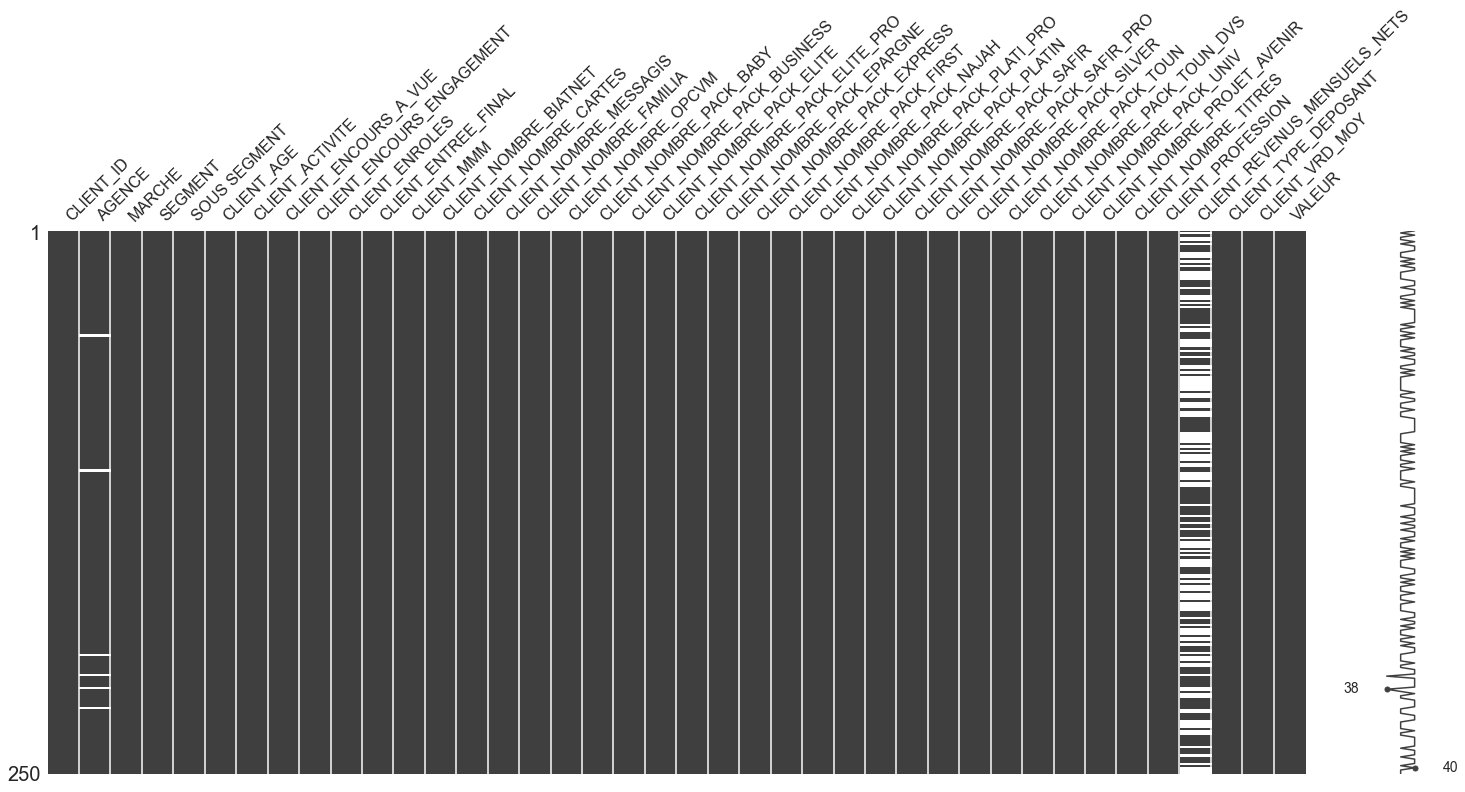

In [12]:
import missingno as msno
%matplotlib inline
msno.matrix(data.sample(250))

In [13]:
data = data.dropna(subset=['CLIENT_AGE','CLIENT_NOMBRE_OPCVM'])

In [14]:
#Assigning types to data
print (data.info())
data.CLIENT_ID = data.CLIENT_ID.astype('int')
data.CLIENT_AGE = data.CLIENT_AGE.astype('int')
data.CLIENT_ENCOURS_A_VUE = data.CLIENT_ENCOURS_A_VUE.replace(',','.', regex=True).astype('float')
data.CLIENT_ENCOURS_ENGAGEMENT = data.CLIENT_ENCOURS_ENGAGEMENT.replace(',','.', regex=True).astype('float')
data.CLIENT_MMM = data.CLIENT_MMM.replace(',','.', regex=True).astype('float')
data.CLIENT_REVENUS_MENSUELS_NETS = data.CLIENT_REVENUS_MENSUELS_NETS.replace(',','.', regex=True).astype('float')
data.CLIENT_VRD_MOY = data.CLIENT_VRD_MOY.replace(',','.', regex=True).astype('float')
data.CLIENT_NOMBRE_PACK_BABY = data.CLIENT_NOMBRE_PACK_BABY.astype('int')
data.CLIENT_NOMBRE_PACK_BUSINESS = data.CLIENT_NOMBRE_PACK_BUSINESS.astype('int')
data.CLIENT_NOMBRE_PACK_ELITE = data.CLIENT_NOMBRE_PACK_ELITE.astype('int')
data.CLIENT_NOMBRE_PACK_ELITE_PRO = data.CLIENT_NOMBRE_PACK_ELITE_PRO.astype('int')
data.CLIENT_NOMBRE_PACK_EPARGNE = data.CLIENT_NOMBRE_PACK_EPARGNE.astype('int')
data.CLIENT_NOMBRE_PACK_EXPRESS = data.CLIENT_NOMBRE_PACK_EXPRESS.astype('int')
data.CLIENT_NOMBRE_PACK_FIRST = data.CLIENT_NOMBRE_PACK_FIRST.astype('int')
data.CLIENT_NOMBRE_PACK_NAJAH = data.CLIENT_NOMBRE_PACK_NAJAH.astype('int')
data.CLIENT_NOMBRE_PACK_PLATI_PRO = data.CLIENT_NOMBRE_PACK_PLATI_PRO.astype('int')
data.CLIENT_NOMBRE_PACK_PLATIN = data.CLIENT_NOMBRE_PACK_PLATIN.astype('int')
data.CLIENT_NOMBRE_PACK_SAFIR = data.CLIENT_NOMBRE_PACK_SAFIR.astype('int')
data.CLIENT_NOMBRE_PACK_SAFIR_PRO = data.CLIENT_NOMBRE_PACK_SAFIR_PRO.astype('int')
data.CLIENT_NOMBRE_PACK_TOUN = data.CLIENT_NOMBRE_PACK_TOUN.astype('int')
data.CLIENT_NOMBRE_PACK_TOUN_DVS = data.CLIENT_NOMBRE_PACK_TOUN_DVS.astype('int')
data.CLIENT_NOMBRE_PACK_UNIV = data.CLIENT_NOMBRE_PACK_UNIV.astype('int')
data.CLIENT_NOMBRE_PACK_SILVER = data.CLIENT_NOMBRE_PACK_SILVER.astype('int')
data.CLIENT_NOMBRE_OPCVM = data.CLIENT_NOMBRE_OPCVM.astype('int')
data.CLIENT_NOMBRE_TITRES = data.CLIENT_NOMBRE_TITRES.astype('int')
data.CLIENT_NOMBRE_CARTES = data.CLIENT_NOMBRE_CARTES.astype('int')
data.CLIENT_NOMBRE_BIATNET = data.CLIENT_NOMBRE_BIATNET.astype('int')
data.CLIENT_NOMBRE_PROJET_AVENIR = data.CLIENT_NOMBRE_PROJET_AVENIR.astype('int')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 834458 entries, 0 to 834752
Data columns (total 40 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   CLIENT_ID                     834458 non-null  object
 1   AGENCE                        817920 non-null  object
 2   MARCHE                        834458 non-null  object
 3   SEGMENT                       834457 non-null  object
 4   SOUS SEGMENT                  834457 non-null  object
 5   CLIENT_AGE                    834458 non-null  object
 6   CLIENT_ACTIVITE               834458 non-null  object
 7   CLIENT_ENCOURS_A_VUE          834458 non-null  object
 8   CLIENT_ENCOURS_ENGAGEMENT     834458 non-null  object
 9   CLIENT_ENROLES                834458 non-null  object
 10  CLIENT_ENTREE_FINAL           834458 non-null  object
 11  CLIENT_MMM                    834458 non-null  object
 12  CLIENT_NOMBRE_BIATNET         834458 non-null  object
 13 

In [15]:
#The data has outliers, hence it's best to fill null values with the median
data.fillna(data.median())

C:\Users\ASUS\AppData\Local\Temp\ipykernel_1636\2591219967.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.fillna(data.median())


,CLIENT_ID,AGENCE,MARCHE,SEGMENT,SOUS SEGMENT,CLIENT_AGE,CLIENT_ACTIVITE,CLIENT_ENCOURS_A_VUE,CLIENT_ENCOURS_ENGAGEMENT,CLIENT_ENROLES,CLIENT_ENTREE_FINAL,CLIENT_MMM,CLIENT_NOMBRE_BIATNET,CLIENT_NOMBRE_CARTES,CLIENT_NOMBRE_MESSAGIS,CLIENT_NOMBRE_FAMILIA,CLIENT_NOMBRE_OPCVM,CLIENT_NOMBRE_PACK_BABY,CLIENT_NOMBRE_PACK_BUSINESS,CLIENT_NOMBRE_PACK_ELITE,CLIENT_NOMBRE_PACK_ELITE_PRO,CLIENT_NOMBRE_PACK_EPARGNE,CLIENT_NOMBRE_PACK_EXPRESS,CLIENT_NOMBRE_PACK_FIRST,CLIENT_NOMBRE_PACK_NAJAH,CLIENT_NOMBRE_PACK_PLATI_PRO,CLIENT_NOMBRE_PACK_PLATIN,CLIENT_NOMBRE_PACK_SAFIR,CLIENT_NOMBRE_PACK_SAFIR_PRO,CLIENT_NOMBRE_PACK_SILVER,CLIENT_NOMBRE_PACK_TOUN,CLIENT_NOMBRE_PACK_TOUN_DVS,CLIENT_NOMBRE_PACK_UNIV,CLIENT_NOMBRE_PROJET_AVENIR,CLIENT_NOMBRE_TITRES,CLIENT_PROFESSION,CLIENT_REVENUS_MENSUELS_NETS,CLIENT_TYPE_DEPOSANT,CLIENT_VRD_MOY,VALEUR
0,178601,A1,PART,CLASSE MOYENNE,1 CM - SALARIÉ,51,Activites juridiques,0.00,27713.798,FALSE,AUTRE,916.666,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,Directeurs d'entreprises,900.0,CLIENT_A_VUE,0.000000,1
1,98070,A1,PART,CLASSE MOYENNE,1 CM - SALARIÉ,58,Autres activites manufacturieres n.c.a.,0.00,84.396,NON,AUTRE,0.000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,Directeurs d'entreprises,1000.0,CLIENT_A_VUE,0.000000,1
2,454569,A1,PART,CLASSE MOYENNE,1 CM - SALARIÉ,57,Coiffure et soins de beaute,3013.95,849.304,NON,AUTRE,1252.316,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,Directeurs d'Ã©tablissements d'enseignement et...,538.0,CLIENT_A_VUE,2933.309050,1
3,40717,A1,PART,CLASSE MOYENNE,1 CM - SALARIÉ,52,Commerce de detail de tabac,0.00,783.062,NON,AUTRE,1748.310,0,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,Magistrats,1000.0,CLIENT_A_VUE,349.795150,1
4,442731,A1,PART,CLASSE MOYENNE,1 CM - SALARIÉ,58,Commerce de gros d'equipements pour la constru...,631.94,0.000,NON,AUTRE,216.331,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Magistrats,1000.0,CLIENT_A_VUE,1373.050000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
834748,907048,NaN,PRO,HAUT DE GAMME,4 AFFLUENT,39,Transports maritimes,0.00,0.000,FALSE,AUTRE,0.000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Conducteurs dans le transport de marchandises,1000.0,CLIENT_EXCLUSIF_EPARGNE,68.235600,1
834749,220819,NaN,PRO,HAUT DE GAMME,4 AFFLUENT,51,Transports maritimes,0.00,0.000,NON,AUTRE,0.000,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,CommerÃ§ants (autres),2000.0,CLIENT_PLACEUR,1036.870605,1
834750,292399,NaN,PRO,HAUT DE GAMME,4 AFFLUENT,45,Transports maritimes,0.00,0.000,NON,AUTRE,0.000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Artisans (autres),1500.0,CLIENT_EXCLUSIF_EPARGNE,1724.586350,1
834751,607524,NaN,PRO,HAUT DE GAMME,4 AFFLUENT,38,Transports maritimes,0.00,284.391,FALSE,AUTRE,0.000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Conducteurs dans le transport de marchandises,1200.0,CLIENT_A_VUE,17.436850,1


There are 16 columns containing the packs of the clients, they will be put in two coulnms only, with the first answering whether the customer is enroled to a pck or not (boolean)
and the second returning the number of packs each customer has (integer)

In [16]:
data['PACK'] = ''
data['PACK'] = np.where((data['CLIENT_NOMBRE_PACK_SAFIR'] > 0) | (data['CLIENT_NOMBRE_PACK_ELITE'] > 0 )
                        |(data['CLIENT_NOMBRE_PACK_ELITE_PRO'] > 0 ) |(data['CLIENT_NOMBRE_PACK_EPARGNE'] > 0 )
                        |(data['CLIENT_NOMBRE_PACK_EXPRESS'] > 0 ) |(data['CLIENT_NOMBRE_PACK_FIRST'] > 0)
                        |(data['CLIENT_NOMBRE_PACK_NAJAH'] > 0 ) |(data['CLIENT_NOMBRE_PACK_PLATI_PRO'] > 0 )
                        |(data['CLIENT_NOMBRE_PACK_PLATIN'] > 0 ) |(data['CLIENT_NOMBRE_PACK_SAFIR'] > 0 )
                        |(data['CLIENT_NOMBRE_PACK_SAFIR_PRO'] > 0 ) |(data['CLIENT_NOMBRE_PACK_SILVER'] > 0 )
                        |(data['CLIENT_NOMBRE_PACK_UNIV'] > 0 )
                        , True, False)
data['PACK']

0          True
1          True
2          True
3          True
4         False
          ...  
834748    False
834749    False
834750    False
834751    False
834752    False
Name: PACK, Length: 834458, dtype: bool

In [17]:
data['TOTAL_PACK'] = ''

cols = ['CLIENT_NOMBRE_PACK_ELITE','CLIENT_NOMBRE_PACK_ELITE_PRO','CLIENT_NOMBRE_PACK_EPARGNE','CLIENT_NOMBRE_PACK_EXPRESS','CLIENT_NOMBRE_PACK_FIRST','CLIENT_NOMBRE_PACK_NAJAH','CLIENT_NOMBRE_PACK_PLATI_PRO','CLIENT_NOMBRE_PACK_PLATIN','CLIENT_NOMBRE_PACK_SAFIR','CLIENT_NOMBRE_PACK_SAFIR_PRO','CLIENT_NOMBRE_PACK_SILVER','CLIENT_NOMBRE_PACK_UNIV']
data['TOTAL_PACK'] = data[cols].sum(axis=1)


In [18]:
data.TOTAL_PACK = data.TOTAL_PACK.replace(',','.', regex=True).astype('float')

In [19]:
data['TOTAL_PACK'].describe()

count    834458.000000
mean          0.582090
std           0.578811
min           0.000000
25%           0.000000
50%           1.000000
75%           1.000000
max           5.000000
Name: TOTAL_PACK, dtype: float64

In [20]:
data=data.drop(columns = ['CLIENT_NOMBRE_PACK_ELITE','CLIENT_NOMBRE_PACK_ELITE_PRO','CLIENT_NOMBRE_PACK_EPARGNE','CLIENT_NOMBRE_PACK_EXPRESS','CLIENT_NOMBRE_PACK_FIRST','CLIENT_NOMBRE_PACK_NAJAH','CLIENT_NOMBRE_PACK_PLATI_PRO','CLIENT_NOMBRE_PACK_PLATIN','CLIENT_NOMBRE_PACK_SAFIR','CLIENT_NOMBRE_PACK_SAFIR_PRO','CLIENT_NOMBRE_PACK_SILVER','CLIENT_NOMBRE_PACK_UNIV','CLIENT_NOMBRE_PACK_BABY','CLIENT_NOMBRE_PACK_BUSINESS','CLIENT_NOMBRE_PACK_TOUN','CLIENT_NOMBRE_PACK_TOUN_DVS'])
data

,CLIENT_ID,AGENCE,MARCHE,SEGMENT,SOUS SEGMENT,CLIENT_AGE,CLIENT_ACTIVITE,CLIENT_ENCOURS_A_VUE,CLIENT_ENCOURS_ENGAGEMENT,CLIENT_ENROLES,CLIENT_ENTREE_FINAL,CLIENT_MMM,CLIENT_NOMBRE_BIATNET,CLIENT_NOMBRE_CARTES,CLIENT_NOMBRE_MESSAGIS,CLIENT_NOMBRE_FAMILIA,CLIENT_NOMBRE_OPCVM,CLIENT_NOMBRE_PROJET_AVENIR,CLIENT_NOMBRE_TITRES,CLIENT_PROFESSION,CLIENT_REVENUS_MENSUELS_NETS,CLIENT_TYPE_DEPOSANT,CLIENT_VRD_MOY,VALEUR,PACK,TOTAL_PACK
0,178601,A1,PART,CLASSE MOYENNE,1 CM - SALARIÉ,51,Activites juridiques,0.00,27713.798,FALSE,AUTRE,916.666,1,0,0,0,0,0,0,Directeurs d'entreprises,900.0,CLIENT_A_VUE,0.000000,1,True,1.0
1,98070,A1,PART,CLASSE MOYENNE,1 CM - SALARIÉ,58,Autres activites manufacturieres n.c.a.,0.00,84.396,NON,AUTRE,0.000,0,0,0,0,0,0,0,Directeurs d'entreprises,NaN,CLIENT_A_VUE,0.000000,1,True,1.0
2,454569,A1,PART,CLASSE MOYENNE,1 CM - SALARIÉ,57,Coiffure et soins de beaute,3013.95,849.304,NON,AUTRE,1252.316,0,1,1,0,0,0,0,Directeurs d'Ã©tablissements d'enseignement et...,538.0,CLIENT_A_VUE,2933.309050,1,True,1.0
3,40717,A1,PART,CLASSE MOYENNE,1 CM - SALARIÉ,52,Commerce de detail de tabac,0.00,783.062,NON,AUTRE,1748.310,0,3,1,0,0,0,0,Magistrats,NaN,CLIENT_A_VUE,349.795150,1,True,1.0
4,442731,A1,PART,CLASSE MOYENNE,1 CM - SALARIÉ,58,Commerce de gros d'equipements pour la constru...,631.94,0.000,NON,AUTRE,216.331,0,0,0,0,0,0,0,Magistrats,NaN,CLIENT_A_VUE,1373.050000,1,False,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
834748,907048,NaN,PRO,HAUT DE GAMME,4 AFFLUENT,39,Transports maritimes,0.00,0.000,FALSE,AUTRE,0.000,0,0,0,0,0,0,0,Conducteurs dans le transport de marchandises,1000.0,CLIENT_EXCLUSIF_EPARGNE,68.235600,1,False,0.0
834749,220819,NaN,PRO,HAUT DE GAMME,4 AFFLUENT,51,Transports maritimes,0.00,0.000,NON,AUTRE,0.000,0,1,0,0,1,0,0,CommerÃ§ants (autres),2000.0,CLIENT_PLACEUR,1036.870605,1,False,0.0
834750,292399,NaN,PRO,HAUT DE GAMME,4 AFFLUENT,45,Transports maritimes,0.00,0.000,NON,AUTRE,0.000,0,0,0,0,0,0,0,Artisans (autres),1500.0,CLIENT_EXCLUSIF_EPARGNE,1724.586350,1,False,0.0
834751,607524,NaN,PRO,HAUT DE GAMME,4 AFFLUENT,38,Transports maritimes,0.00,284.391,FALSE,AUTRE,0.000,0,1,0,0,0,0,0,Conducteurs dans le transport de marchandises,1200.0,CLIENT_A_VUE,17.436850,1,False,0.0


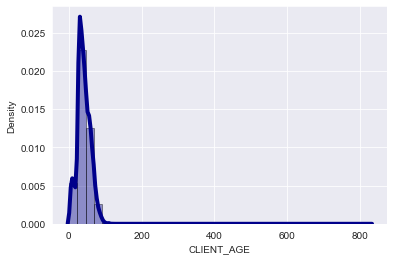

In [21]:
# Histogram and density of clients ages
import warnings
warnings.filterwarnings('ignore')
sns.distplot(data['CLIENT_AGE'], hist=True, kde=True,
             bins=int(180/5), color = 'darkblue',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4});

--> The feature AGE is Gaussian Distributed

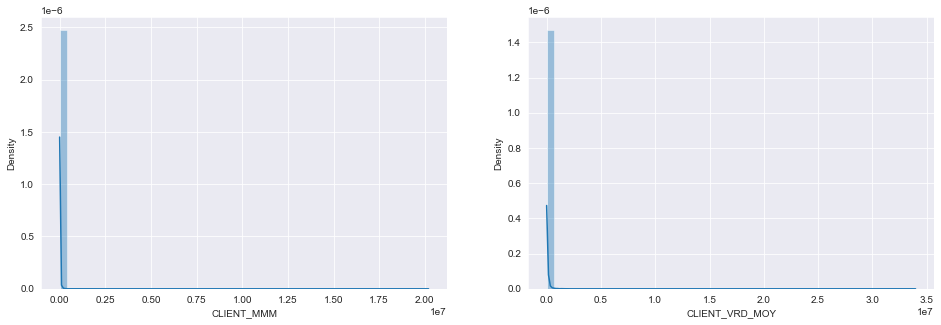

In [22]:
#Plot distributions for the feautures
warnings.filterwarnings('ignore')
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(data['CLIENT_MMM'])
plt.subplot(1,2,2)
sns.distplot(data['CLIENT_VRD_MOY'])
plt.show()

--> The feature MMM and VRD are skewed


### Detecting outliers

In [23]:
data['CLIENT_AGE'].value_counts()

30     23163
29     22895
31     22267
32     21904
28     21847
       ...  
326        1
830        1
827        1
828        1
228        1
Name: CLIENT_AGE, Length: 130, dtype: int64

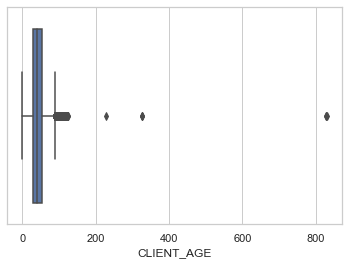

In [24]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x = data["CLIENT_AGE"] ,data = data)

The reasonable range of age is between 18 and 80 years old

In [25]:
#Knowing that the age range should be between 18 and 80, the outliers will be removed
index = data[(data['CLIENT_AGE'] >= 80)|(data['CLIENT_AGE'] <= 18)].index
data.drop(index, inplace=True)
data['CLIENT_AGE'].describe()

count    743740.000000
mean         43.033373
std          14.093584
min          19.000000
25%          31.000000
50%          41.000000
75%          53.000000
max          79.000000
Name: CLIENT_AGE, dtype: float64

<AxesSubplot:>

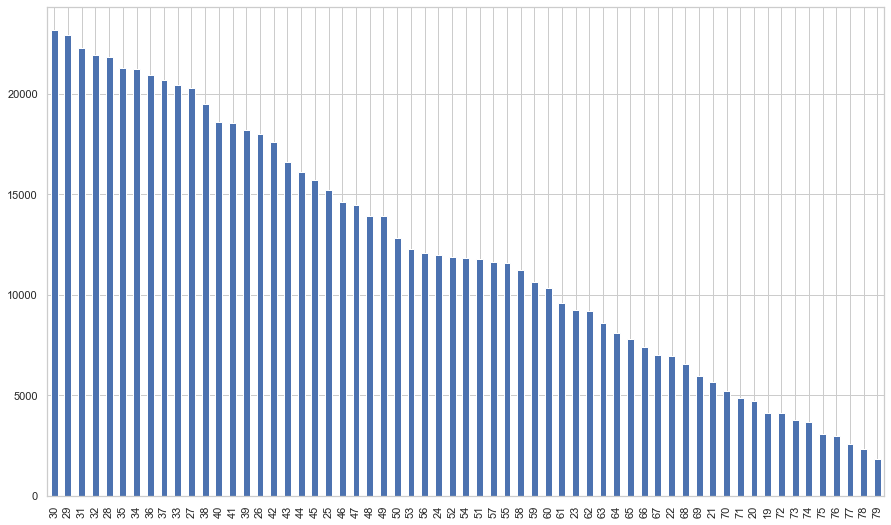

In [26]:
data['CLIENT_AGE'].value_counts().plot.bar(figsize = (15, 9))


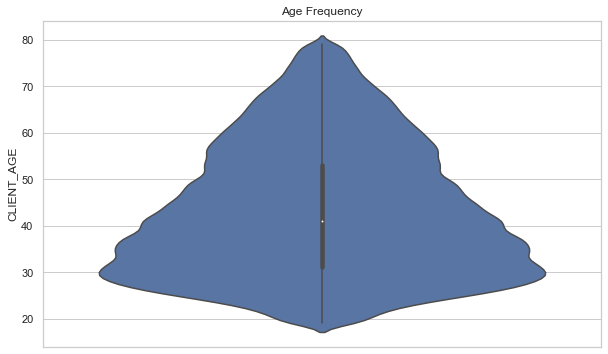

In [27]:
plt.figure(figsize=(10,6))
plt.title("Age Frequency")
sns.axes_style("dark")
sns.violinplot(y=data["CLIENT_AGE"])
plt.show()

--> The clients are more frequent at around the age of 30.

In [28]:
import scipy.stats as stat
import pylab
#### If you want to check whether feature is guassian or normal distributed
#### Q-Q plot
def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()

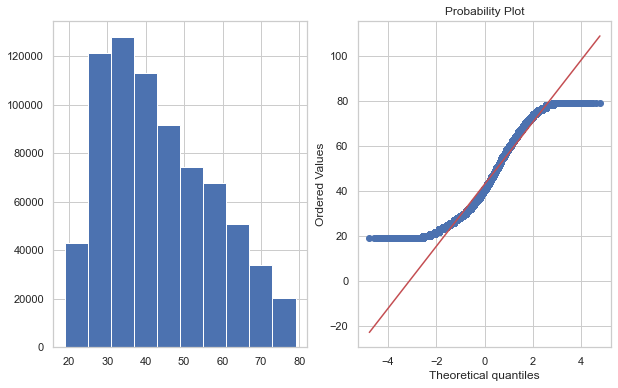

In [29]:
plot_data(data , 'CLIENT_AGE')


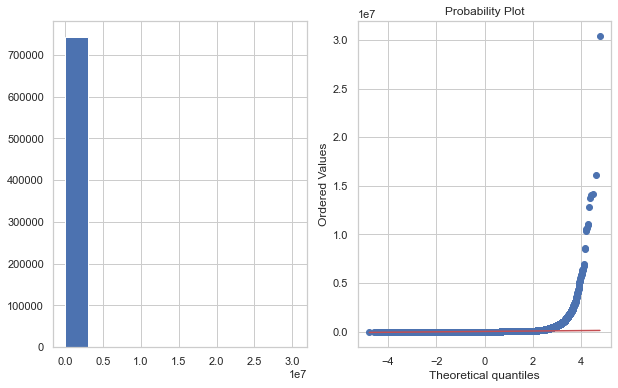

In [30]:
plot_data(data , 'CLIENT_VRD_MOY')

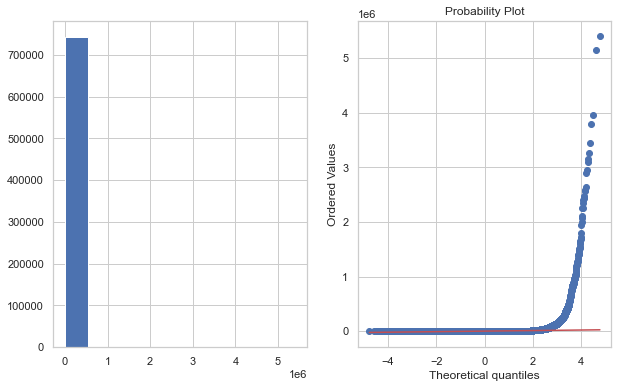

In [31]:
plot_data(data , 'CLIENT_MMM')


In [32]:
data.select_dtypes(include=np.number)

,CLIENT_ID,CLIENT_AGE,CLIENT_ENCOURS_A_VUE,CLIENT_ENCOURS_ENGAGEMENT,CLIENT_MMM,CLIENT_NOMBRE_BIATNET,CLIENT_NOMBRE_CARTES,CLIENT_NOMBRE_OPCVM,CLIENT_NOMBRE_PROJET_AVENIR,CLIENT_NOMBRE_TITRES,CLIENT_REVENUS_MENSUELS_NETS,CLIENT_VRD_MOY,TOTAL_PACK
0,178601,51,0.00,27713.798,916.666,1,0,0,0,0,900.0,0.000000,1.0
1,98070,58,0.00,84.396,0.000,0,0,0,0,0,NaN,0.000000,1.0
2,454569,57,3013.95,849.304,1252.316,0,1,0,0,0,538.0,2933.309050,1.0
3,40717,52,0.00,783.062,1748.310,0,3,0,0,0,NaN,349.795150,1.0
4,442731,58,631.94,0.000,216.331,0,0,0,0,0,NaN,1373.050000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
834748,907048,39,0.00,0.000,0.000,0,0,0,0,0,1000.0,68.235600,0.0
834749,220819,51,0.00,0.000,0.000,0,1,1,0,0,2000.0,1036.870605,0.0
834750,292399,45,0.00,0.000,0.000,0,0,0,0,0,1500.0,1724.586350,0.0
834751,607524,38,0.00,284.391,0.000,0,1,0,0,0,1200.0,17.436850,0.0


In [33]:
Q1=data[["CLIENT_MMM","CLIENT_NOMBRE_OPCVM","CLIENT_NOMBRE_TITRES","CLIENT_VRD_MOY"
         ,"CLIENT_NOMBRE_CARTES","CLIENT_NOMBRE_BIATNET","CLIENT_NOMBRE_PROJET_AVENIR",
         "CLIENT_ENCOURS_A_VUE","CLIENT_ENCOURS_ENGAGEMENT","CLIENT_REVENUS_MENSUELS_NETS","TOTAL_PACK"]].describe().T["25%"]
Q3=data[["CLIENT_MMM","CLIENT_NOMBRE_OPCVM","CLIENT_NOMBRE_TITRES","CLIENT_VRD_MOY"
         ,"CLIENT_NOMBRE_CARTES","CLIENT_NOMBRE_BIATNET","CLIENT_NOMBRE_PROJET_AVENIR",
         "CLIENT_ENCOURS_A_VUE","CLIENT_ENCOURS_ENGAGEMENT","CLIENT_REVENUS_MENSUELS_NETS","TOTAL_PACK"]].describe().T["75%"].T
IQR=(Q3-Q1)

In [34]:
data[data.CLIENT_MMM<(Q1.CLIENT_MMM - 3 * IQR.CLIENT_MMM)]
data.drop(data[data.CLIENT_MMM>(Q3.CLIENT_MMM + 3  * IQR.CLIENT_MMM)].index,inplace=True)

data[data.CLIENT_NOMBRE_OPCVM<(Q1.CLIENT_NOMBRE_OPCVM - 3 * IQR.CLIENT_NOMBRE_OPCVM)]
data.drop(data[data.CLIENT_NOMBRE_OPCVM>(Q3.CLIENT_NOMBRE_TITRES + 3  * IQR.CLIENT_NOMBRE_OPCVM)].index,inplace=True)

data[data.CLIENT_NOMBRE_TITRES<(Q1.CLIENT_NOMBRE_TITRES - 3 * IQR.CLIENT_NOMBRE_TITRES)]
data.drop(data[data.CLIENT_NOMBRE_TITRES>(Q3.CLIENT_NOMBRE_TITRES + 3  * IQR.CLIENT_NOMBRE_TITRES)].index,inplace=True)

data[data.CLIENT_VRD_MOY<(Q1.CLIENT_VRD_MOY - 3 * IQR.CLIENT_VRD_MOY)]
data.drop(data[data.CLIENT_VRD_MOY>(Q3.CLIENT_VRD_MOY + 3  * IQR.CLIENT_VRD_MOY)].index,inplace=True)

data[data.CLIENT_NOMBRE_CARTES<(Q1.CLIENT_NOMBRE_CARTES - 3 * IQR.CLIENT_NOMBRE_CARTES)]
data.drop(data[data.CLIENT_NOMBRE_CARTES>(Q3.CLIENT_NOMBRE_CARTES + 3  * IQR.CLIENT_NOMBRE_CARTES)].index,inplace=True)

data[data.CLIENT_NOMBRE_BIATNET<(Q1.CLIENT_NOMBRE_BIATNET - 3 * IQR.CLIENT_NOMBRE_BIATNET)]
data.drop(data[data.CLIENT_NOMBRE_BIATNET>(Q3.CLIENT_NOMBRE_BIATNET + 3  * IQR.CLIENT_NOMBRE_BIATNET)].index,inplace=True)

data[data.CLIENT_NOMBRE_PROJET_AVENIR<(Q1.CLIENT_NOMBRE_PROJET_AVENIR - 3 * IQR.CLIENT_NOMBRE_PROJET_AVENIR)]
data.drop(data[data.CLIENT_NOMBRE_PROJET_AVENIR>(Q3.CLIENT_NOMBRE_PROJET_AVENIR + 3  * IQR.CLIENT_NOMBRE_PROJET_AVENIR)].index,inplace=True)

data[data.CLIENT_ENCOURS_A_VUE<(Q1.CLIENT_ENCOURS_A_VUE - 3 * IQR.CLIENT_ENCOURS_A_VUE)]
data.drop(data[data.CLIENT_ENCOURS_A_VUE>(Q3.CLIENT_ENCOURS_A_VUE + 3  * IQR.CLIENT_ENCOURS_A_VUE)].index,inplace=True)

data[data.CLIENT_ENCOURS_ENGAGEMENT<(Q1.CLIENT_ENCOURS_ENGAGEMENT - 3 * IQR.CLIENT_ENCOURS_ENGAGEMENT)]
data.drop(data[data.CLIENT_ENCOURS_ENGAGEMENT>(Q3.CLIENT_ENCOURS_ENGAGEMENT+ 3  * IQR.CLIENT_ENCOURS_ENGAGEMENT)].index,inplace=True)

data[data.CLIENT_REVENUS_MENSUELS_NETS<(Q1.CLIENT_REVENUS_MENSUELS_NETS - 3 * IQR.CLIENT_REVENUS_MENSUELS_NETS)]
data.drop(data[data.CLIENT_REVENUS_MENSUELS_NETS>(Q3.CLIENT_REVENUS_MENSUELS_NETS + 3  * IQR.CLIENT_REVENUS_MENSUELS_NETS)].index,inplace=True)

data[data.TOTAL_PACK<(Q1.TOTAL_PACK - 3 * IQR.TOTAL_PACK)]
data.drop(data[data.TOTAL_PACK>(Q3.TOTAL_PACK + 3  * IQR.TOTAL_PACK)].index,inplace=True)

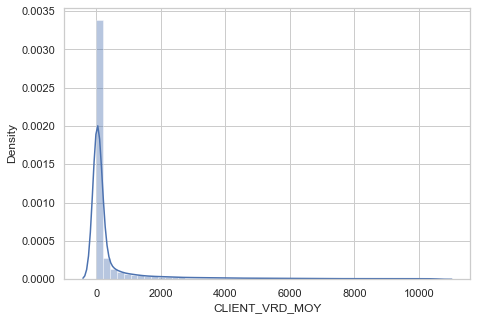

In [35]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(data['CLIENT_VRD_MOY'])
plt.show()

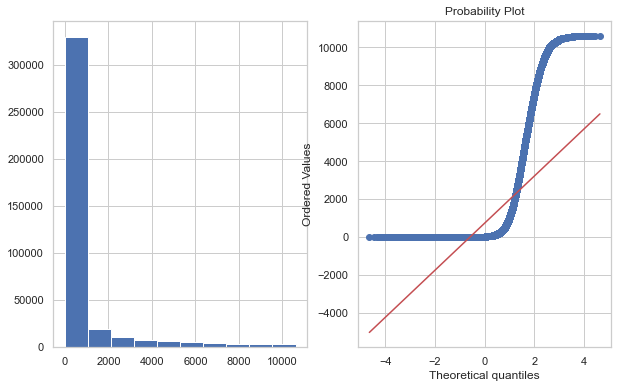

In [36]:
plot_data(data , 'CLIENT_VRD_MOY')


In [37]:
data['CLIENT_VRD_MOY'].describe()

count    391806.000000
mean        745.732153
std        1818.358326
min           0.000000
25%          13.515400
50%          35.468450
75%         302.564762
max       10604.643900
Name: CLIENT_VRD_MOY, dtype: float64

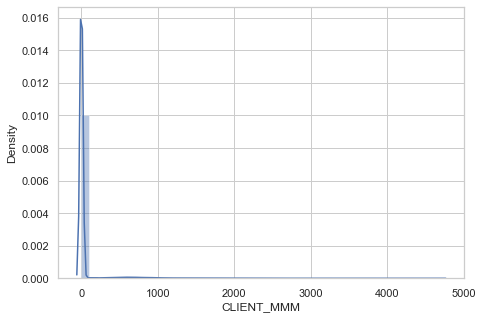

In [38]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(data['CLIENT_MMM'])
plt.show()

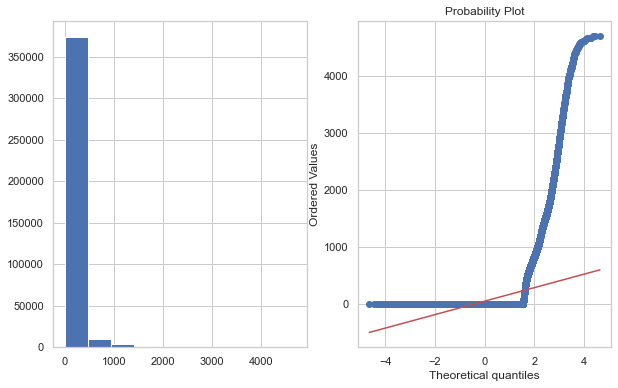

In [39]:
plot_data(data , 'CLIENT_MMM')

In [40]:
data['CLIENT_MMM'].describe()


count    391806.000000
mean         52.086778
std         262.650684
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max        4704.003000
Name: CLIENT_MMM, dtype: float64

In [41]:
data['CLIENT_ENCOURS_A_VUE'].describe()


count    391806.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           0.0
Name: CLIENT_ENCOURS_A_VUE, dtype: float64

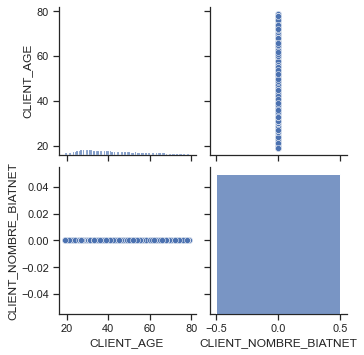

In [42]:
sns.set(style="ticks", color_codes=True)
gggg = sns.pairplot(data , vars=["CLIENT_AGE", "CLIENT_NOMBRE_BIATNET"])
plt.show()

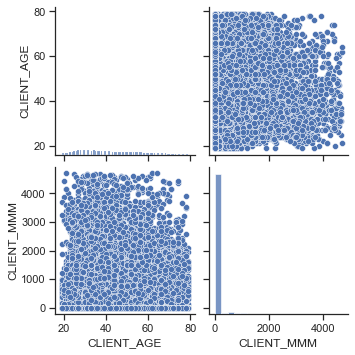

In [43]:
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(data , vars=["CLIENT_AGE", "CLIENT_MMM"])
plt.show()

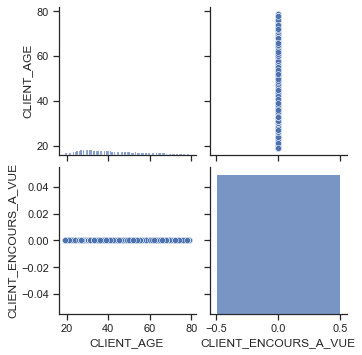

In [44]:
sns.set(style="ticks", color_codes=True)
fggg = sns.pairplot(data , vars=["CLIENT_AGE", "CLIENT_ENCOURS_A_VUE"])
plt.show()

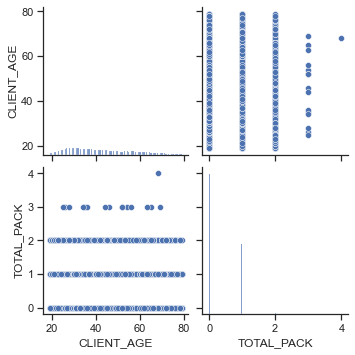

In [45]:
sns.set(style="ticks", color_codes=True)
gg = sns.pairplot(data , vars=["CLIENT_AGE", "TOTAL_PACK"])
plt.show()

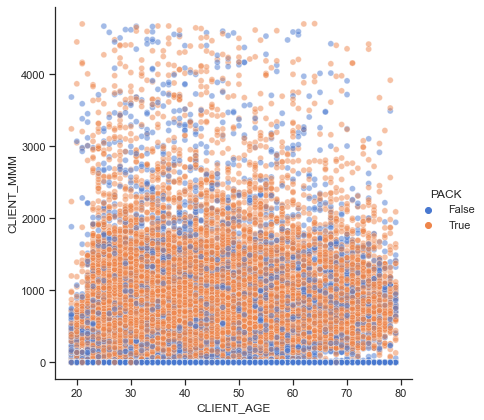

In [46]:
sns.relplot(x="CLIENT_AGE", y="CLIENT_MMM", hue="PACK",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=data)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60]),
 [Text(0, 0, '19'),
  Text(1, 0, '20'),
  Text(2, 0, '21'),
  Text(3, 0, '22'),
  Text(4, 0, '23'),
  Text(5, 0, '24'),
  Text(6, 0, '25'),
  Text(7, 0, '26'),
  Text(8, 0, '27'),
  Text(9, 0, '28'),
  Text(10, 0, '29'),
  Text(11, 0, '30'),
  Text(12, 0, '31'),
  Text(13, 0, '32'),
  Text(14, 0, '33'),
  Text(15, 0, '34'),
  Text(16, 0, '35'),
  Text(17, 0, '36'),
  Text(18, 0, '37'),
  Text(19, 0, '38'),
  Text(20, 0, '39'),
  Text(21, 0, '40'),
  Text(22, 0, '41'),
  Text(23, 0, '42'),
  Text(24, 0, '43'),
  Text(25, 0, '44'),
  Text(26, 0, '45'),
  Text(27, 0, '46'),
  Text(28, 0, '47'),
  Text(29, 0, '48'),
  Text(30, 0, '49'),
  Text(31, 0, '50'),
  Text(32, 0, '51'),
  Text(33, 0, '52'),
  Text(34, 0, '53'

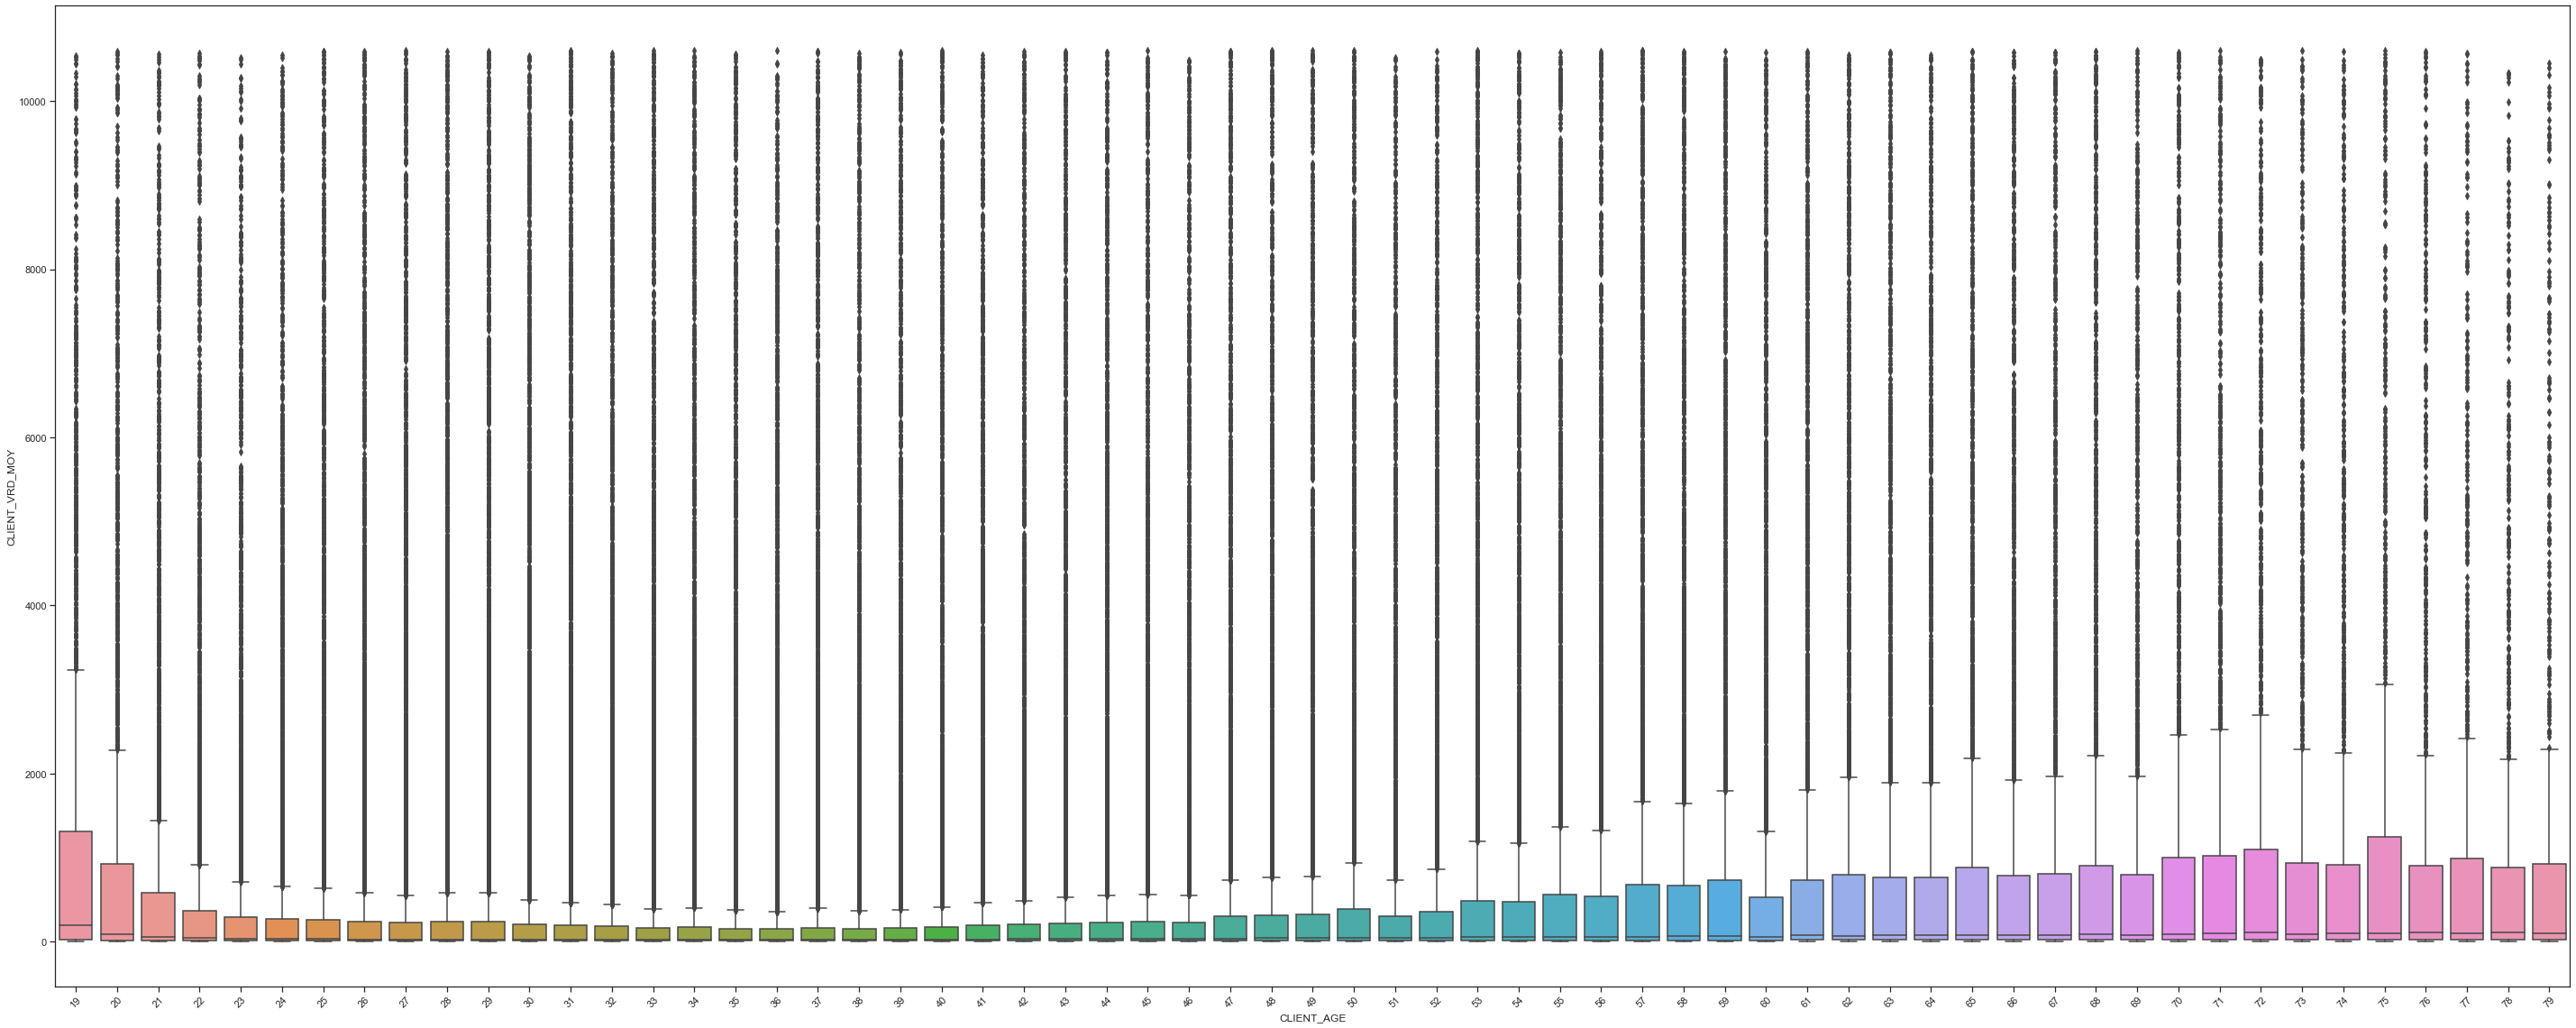

In [47]:
plt.figure(figsize = (50, 20))
ax = sns.boxplot(x = data['CLIENT_AGE'], y = data['CLIENT_VRD_MOY'], data= data)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)

## Categorical data


In [48]:
data['CLIENT_ENROLES'].unique()

array(['NON', 'FALSE', 'TRUE'], dtype=object)

The feature 'CLIENT_ENROLES' contains three attributes FALSE NON TRUE

In [49]:
data['CLIENT_ENROLES'].replace('NON','FALSE',inplace=True)


In [50]:
data['CLIENT_ENROLES'].value_counts()

FALSE    390118
TRUE       1688
Name: CLIENT_ENROLES, dtype: int64

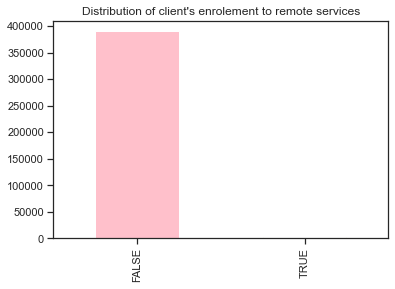

In [51]:
data.CLIENT_ENROLES.value_counts().plot(kind="bar" , color=['pink','olive'])
plt.title("Distribution of client's enrolement to remote services")
plt.show()

--> Most of the clients are not enrolled to the remote services so the column can be removed

In [52]:
data=data.drop(columns = ['CLIENT_ENROLES'])


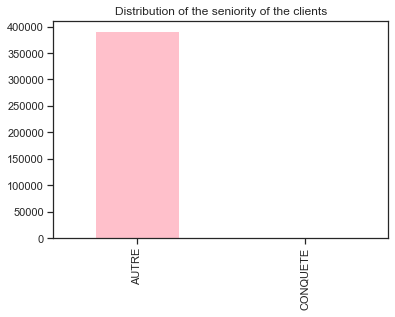

In [53]:
#Client's seniority

data.CLIENT_ENTREE_FINAL.value_counts().plot(kind="bar" , color=['pink','olive'])
plt.title("Distribution of the seniority of the clients")
plt.show()

In [54]:
len(data[data['CLIENT_ENTREE_FINAL']=='CONQUETE'])


349

In [55]:
len(data[data['CLIENT_ENTREE_FINAL']=='AUTRE'])


391457

In [56]:
data = data.drop(columns='CLIENT_ENTREE_FINAL')

In [57]:
#Analyzing Segment feature
data['SEGMENT'].unique()

array(['CLASSE MOYENNE', 'GRAND PUBLIC', 'HAUT DE GAMME', 'JEUNES', 'XXX',
       'TRE'], dtype=object)

In [58]:

#working only with these four segments 'CLASSE MOYENNE', 'GRAND PUBLIC', 'HAUT DE GAMME', 'JEUNES'
data.drop(data[data['SEGMENT'] == 'XXX'].index, inplace = True)
data.drop(data[data['SEGMENT'] == 'TRE'].index, inplace = True)
data.drop(data[data['SEGMENT'] == 'ENR'].index, inplace = True)
data.drop(data[data['SEGMENT'] == 'AUTRES'].index, inplace = True)
data['SEGMENT'].unique()

array(['CLASSE MOYENNE', 'GRAND PUBLIC', 'HAUT DE GAMME', 'JEUNES'],
      dtype=object)

In [59]:

data['SEGMENT'].value_counts()


GRAND PUBLIC      260947
CLASSE MOYENNE     66054
JEUNES             41563
HAUT DE GAMME      23223
Name: SEGMENT, dtype: int64

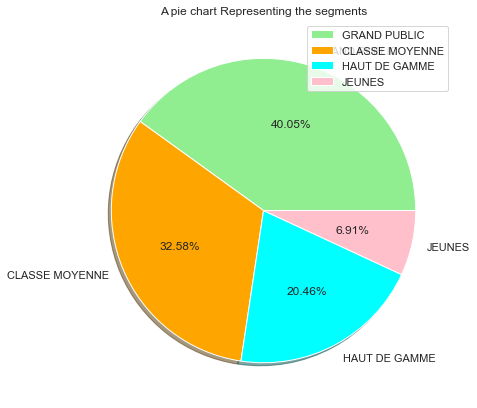

In [60]:
#Visualizing segments
labels = ['GRAND PUBLIC ', 'CLASSE MOYENNE','HAUT DE GAMME','JEUNES']
size = [297934, 242402 , 152200 ,51405 ]
colors = ['lightgreen', 'orange','cyan','pink']
explode = None

plt.rcParams['figure.figsize'] = (7, 7)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('A pie chart Representing the segments')
plt.axis('off')
plt.legend()
plt.show()

In [61]:
data['CLIENT_PROFESSION'].unique()


array(["Directeurs d'entreprises",
       'Cadres moyens dans les autres services',
       "Enseignants de l'enseignement secondaire", 'Sans profession',
       'MÃ©decins de la fonction publique et assimilÃ©s',
       'Autres cadres supÃ©rieurs',
       "Membres de l'exÃ©cutif et du corps lÃ©gislatif",
       "Cadres moyens dans l'administration publique",
       'Techniciens (autres)', "Cadres moyens dans l'industrie",
       'EmployÃ©s de bureau',
       'Techniciens en batiment et travaux publics',
       'Cadres moyens des services administratifs et financiers',
       "Ouvriers dans l'industrie",
       'SecrÃ©taires, opÃ©rateurs de traitement de texte et assimilÃ©s',
       'RetraitÃ©s', "Enseignants de l'enseignement primaire",
       'Techniciens en informatique et nouvelles technologies',
       "Hauts fonctionnaires de l'administration publique", 'Magistrats',
       'IngÃ©nieurs', 'ElÃ¨ves', 'Enseignants universitaires',
       "Agents d'accueil, de sÃ©curitÃ© et de nettoya

In [62]:
data['CLIENT_ACTIVITE'].unique()

array(['Autres activites manufacturieres n.c.a.',
       'Hotels avec restaurant', 'N_D', 'Pratique medicale',
       'Services domestiques', 'Coiffure et soins de beaute',
       'Commerce de detail de livres, journaux et papeterie',
       "Commerce de gros d'equipements pour la construction",
       'Fabrication de vetements de dessous', 'Transports maritimes',
       "Activites d'architecture",
       'Autres commerces de detail en magasin non specialise sans predominance alimentaire',
       "Activites comptables et d'audit, conseil fiscal",
       'Autres intermediaires specialises du commerce',
       'Autres services personnels', 'Commerce de gros de textiles',
       'Culture de legumes, maraichage',
       'Fabrication de plaques, feuilles, tubes et profiles en matieres plastiques',
       'Pisciculture et aquaculture',
       "Commerce de detail de meubles et d'equipements du foyer",
       'Conseil en systemes informatiques',
       'Construction de batiments ( gros oeuvre 

The columns 'CLIENT_ACTIVITE' and 'CLIENT_PROFESSION' both refer to same thing. Only the cloumn 'CLIENT_PROFESSION' will be used

In [63]:
data=data.drop(columns = ['CLIENT_ACTIVITE'])


<AxesSubplot:>

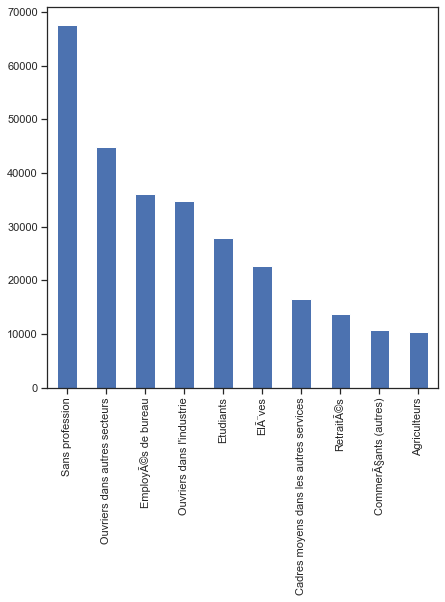

In [64]:
data.CLIENT_PROFESSION.value_counts()[:10].plot(kind='bar')


The majority of the clients do not have a job
Also the professions will be categorized and corrected.

In [65]:
#Cadre sup
data['CLIENT_PROFESSION'].replace("Autres cadres supÃ©rieurs", "Cadre supérieur", inplace=True)
data['CLIENT_PROFESSION'].replace("Cadres supÃ©rieurs des services administratifs et financiers", "Cadre supérieur", inplace=True)
data['CLIENT_PROFESSION'].replace("Cadres supÃ©rieurs dans l'industrie", "Cadre supérieur", inplace=True)
data['CLIENT_PROFESSION'].replace("Hauts fonctionnaires de l'administration publique", "Cadre supérieur", inplace=True)
data['CLIENT_PROFESSION'].replace("Chefs de mission diplomatique et assimilÃ©s", "Cadre supérieur", inplace=True)
#Cadre moy
data['CLIENT_PROFESSION'].replace("Cadres moyens dans les autres services", "Cadre moyen", inplace=True)
data['CLIENT_PROFESSION'].replace("Cadres moyens dans l'administration publique", "Cadre moyen", inplace=True)
data['CLIENT_PROFESSION'].replace("Cadres moyens dans l'industrie", "Cadre moyen", inplace=True)
data['CLIENT_PROFESSION'].replace("Cadres moyens des services administratifs et financiers", "Cadre moyen", inplace=True)
data['CLIENT_PROFESSION'].replace("Cadres moyens dans l'administration publique", "Cadre moyen", inplace=True)

#Justice

data['CLIENT_PROFESSION'].replace("Huissiers de justice, notaires, experts judiciaires et assimilÃ©s", "Acteur de la justice", inplace=True)
data['CLIENT_PROFESSION'].replace("Membres de l'exÃ©cutif et du corps lÃ©gislatif", "Acteur de la justice", inplace=True)
data['CLIENT_PROFESSION'].replace("Magistrats", "Acteur de la justice", inplace=True)
data['CLIENT_PROFESSION'].replace("Avocats", "Acteur de la justice", inplace=True)

#Employés de bureau

data['CLIENT_PROFESSION'].replace("EmployÃ©s de bureau", "Employés de bureau", inplace=True)
data['CLIENT_PROFESSION'].replace("SecrÃ©taires, opÃ©rateurs de traitement de texte et assimilÃ©s", "Employé de bureau", inplace=True)

#Retraités
data['CLIENT_PROFESSION'].replace("RetraitÃ©s", "Retraités", inplace=True)



#Santé
data['CLIENT_PROFESSION'].replace("MÃ©decins de la fonction publique et assimilÃ©s", "Professionnel en santé", inplace=True)
data['CLIENT_PROFESSION'].replace("MÃ©decins gÃ©nÃ©ralistes", "Professionnel en santé", inplace=True)
data['CLIENT_PROFESSION'].replace("MÃ©decins spÃ©cialistes", "Professionnel en santé", inplace=True)

data['CLIENT_PROFESSION'].replace("MÃ©decins dentistes", "Professionnel en santé", inplace=True)
data['CLIENT_PROFESSION'].replace("MÃ©decins vÃ©tÃ©rinaires", "Professionnel en santé", inplace=True)

data['CLIENT_PROFESSION'].replace("Pharmaciens", "Professionnel en santé ", inplace=True)

data['CLIENT_PROFESSION'].replace("MÃ©decins", "Professionnel en santé ", inplace=True)

# para
data['CLIENT_PROFESSION'].replace("Opticiens-lunetiers", "Professionnel en para-médicales", inplace=True)
data['CLIENT_PROFESSION'].replace("Professions para-mÃ©dicales", "Professionnel en para-médicales", inplace=True)


#Dirigeant
data['CLIENT_PROFESSION'].replace("Dirigeants et gÃ©rants dans l'industrie", "Dirigeant et gérant ", inplace=True)
data['CLIENT_PROFESSION'].replace("Dirigeants et gÃ©rants dans le tourisme, la restauration et l'hotellerie", "Dirigeant et gérant", inplace=True)

data['CLIENT_PROFESSION'].replace("Dirigeants et gÃ©rants dans le transport", "Dirigeant et gérant", inplace=True)

data['CLIENT_PROFESSION'].replace("Dirigeants et gÃ©rants dans l'agriculture et la pÃªche", "Dirigeant et gérant", inplace=True)
data['CLIENT_PROFESSION'].replace("Dirigeants et gÃ©rants dans les services", "Dirigeant et gérant", inplace=True)

#Ingénieur
data['CLIENT_PROFESSION'].replace("IngÃ©nieurs", "Ingénieurs", inplace=True)

#Technicien
data['CLIENT_PROFESSION'].replace("Techniciens (autres)", "Technicien", inplace=True)
data['CLIENT_PROFESSION'].replace("Techniciens en batiment et travaux publics", "Technicien", inplace=True)
data['CLIENT_PROFESSION'].replace("Techniciens en informatique et nouvelles technologies", "Technicien", inplace=True)
data['CLIENT_PROFESSION'].replace("Techniciens de laboratoire", "Technicien", inplace=True)


#Ouvrier
data['CLIENT_PROFESSION'].replace("Ouvriers des mÃ©tiers d'artisanat", "Ouvrier", inplace=True)
data['CLIENT_PROFESSION'].replace("Ouvriers dans autres secteurs", "Ouvrier", inplace=True)
data['CLIENT_PROFESSION'].replace("Ouvriers dans l'industrie", "Ouvrier", inplace=True)
data['CLIENT_PROFESSION'].replace("Ouvriers agricoles", "Ouvrier", inplace=True)

#Scientifique
data['CLIENT_PROFESSION'].replace("SpÃ©cialistes scientifiques", "Spécialiste scientifique", inplace=True)
data['CLIENT_PROFESSION'].replace("Biologistes et assimilÃ©s", "Spécialiste scientifique", inplace=True)
#Prestataire de services
data['CLIENT_PROFESSION'].replace("Coiffeurs, esthÃ©ticiens et assimilÃ©s", "Prestataire de services", inplace=True)
data['CLIENT_PROFESSION'].replace("Courtiers", "Prestataire de services", inplace=True)
data['CLIENT_PROFESSION'].replace("Autres prestataires de service", "Prestataire de services", inplace=True)

#Acteur en bâtiment travaux publics
data['CLIENT_PROFESSION'].replace("MaÃ§ons et assimilÃ©s", "Acteur en bâtiment travaux publics", inplace=True)
data['CLIENT_PROFESSION'].replace("Electriciens", "Acteur en bâtiment travaux publics", inplace=True)
data['CLIENT_PROFESSION'].replace("MÃ©caniciens", "Acteur en bâtiment travaux publics", inplace=True)
data['CLIENT_PROFESSION'].replace("Conducteurs dans le batiment et travaux publics", "Acteur en bâtiment travaux publics", inplace=True)
data['CLIENT_PROFESSION'].replace("Plombiers", "Acteur en bâtiment travaux publics", inplace=True)
data['CLIENT_PROFESSION'].replace("Architectes et urbanistes", "Acteur en bâtiment travaux publics", inplace=True)
data['CLIENT_PROFESSION'].replace("Menuisiers", "Acteur en bâtiment travaux publics", inplace=True)

#Consultant
data['CLIENT_PROFESSION'].replace("Conseillers et consultants", "Conseiller et consultant", inplace=True)
data['CLIENT_PROFESSION'].replace("Experts-comptables", "Conseiller et consultant", inplace=True)

#Service défense sécurité
data['CLIENT_PROFESSION'].replace("Forces ArmÃ©es", "Acteur en service de défense/sécurité", inplace=True)


data['CLIENT_PROFESSION'].replace("Agents de la force publique", "Acteur en service de défense/sécurité", inplace=True)
data['CLIENT_PROFESSION'].replace("Pilotes et officiers de pont", "Acteur en service de défense/sécurité", inplace=True)

#Artisan
data['CLIENT_PROFESSION'].replace("Artisans dans la restauration, l'alimentation et assimilÃ©s", "Artisan", inplace=True)
data['CLIENT_PROFESSION'].replace("Artisans du batiment et assimilÃ©s", "Artisan", inplace=True)
data['CLIENT_PROFESSION'].replace("Artisans du textile, de l'habillement et assimilÃ©s", "Artisan", inplace=True)
data['CLIENT_PROFESSION'].replace("Artisans dans l'imprimerie et assimilÃ©s", "Artisan", inplace=True)
data['CLIENT_PROFESSION'].replace("Artisans du bois et assimilÃ©s", "Artisan", inplace=True)
data['CLIENT_PROFESSION'].replace("Artisans du cuir et de la chaussure", "Artisan", inplace=True)
data['CLIENT_PROFESSION'].replace("Artisans (autres)", "Artisan", inplace=True)

#Commerçant
data['CLIENT_PROFESSION'].replace("CommerÃ§ants (autres)", "Commerçant", inplace=True)
data['CLIENT_PROFESSION'].replace("CommerÃ§ants dans l'alimentation gÃ©nÃ©rale", "Commerçant", inplace=True)
data['CLIENT_PROFESSION'].replace("CommerÃ§ants dans l'entretien et rÃ©paration", "Commerçant", inplace=True)
data['CLIENT_PROFESSION'].replace("CommerÃ§ants dans l'habillement et la chaussure", "Commerçant", inplace=True)

data['CLIENT_PROFESSION'].replace("CommerÃ§ants dans le tourisme, loisirs et restauration", "Commerçant", inplace=True)
data['CLIENT_PROFESSION'].replace("CommerÃ§ants dans l'ameublement, appareils Ã©lectro mÃ©nager et assimilÃ©s", "Commerçant", inplace=True)



#Education
data['CLIENT_PROFESSION'].replace("Inspecteur pÃ©dagogique", "Acteur dans le secteur d'éducation", inplace=True)
data['CLIENT_PROFESSION'].replace("Directeurs d'Ã©tablissements d'enseignement et de formation, et assimilÃ©s", "Acteur dans le secteur d'éducation", inplace=True)
data['CLIENT_PROFESSION'].replace("Enseignants de l'enseignement primaire", "Acteur dans le secteur d'éducation", inplace=True)
data['CLIENT_PROFESSION'].replace("Enseignants universitaires", "Acteur dans le secteur d'éducation", inplace=True)
data['CLIENT_PROFESSION'].replace("Enseignants de l'enseignement secondaire", "Acteur dans le secteur d'éducation", inplace=True)

#Agriculture
data['CLIENT_PROFESSION'].replace("PÃªcheurs", "Agriculteur", inplace=True)
data['CLIENT_PROFESSION'].replace("Eleveurs", "Agriculteur", inplace=True)
data['CLIENT_PROFESSION'].replace("Agriculteurs", "Agriculteur", inplace=True)

#Conducteurs
data['CLIENT_PROFESSION'].replace("Conducteurs dans le transport de marchandises", "Conducteur", inplace=True)
data['CLIENT_PROFESSION'].replace("Chauffeurs de taxis et conducteurs d'automobiles et de camionnettes", "Conducteur", inplace=True)
data['CLIENT_PROFESSION'].replace("Conducteurs d'engins agricoles", "Conducteur", inplace=True)
data['CLIENT_PROFESSION'].replace("Conducteurs dans le transport public", "Conducteur", inplace=True)
data['CLIENT_PROFESSION'].replace("Conducteurs d'engins agricoles", "Conducteur", inplace=True)

data['CLIENT_PROFESSION'].replace("Etudiants", "Étudiants", inplace=True)
data['CLIENT_PROFESSION'].replace("Sportifs et assimilÃ©s", "Sportifs et assimilés", inplace=True)



#Agent

data['CLIENT_PROFESSION'].replace("Agents d'accueil, de sÃ©curitÃ© et de nettoyage", "Agent", inplace=True)
data['CLIENT_PROFESSION'].replace("Agents", "Agent", inplace=True)
data['CLIENT_PROFESSION'].replace("Transitaires et commissionnaires", "Agent", inplace=True)

data['CLIENT_PROFESSION'].replace("ElÃ¨ves", "Élèves", inplace=True)




In [66]:
data['CLIENT_PROFESSION'].unique()

array(["Directeurs d'entreprises", 'Cadre moyen',
       "Acteur dans le secteur d'éducation", 'Sans profession',
       'Professionnel en santé', 'Cadre supérieur',
       'Acteur de la justice', 'Technicien', 'Employés de bureau',
       'Ouvrier', 'Employé de bureau', 'Retraités', 'Ingénieurs',
       'Élèves', 'Agent', 'Dirigeant et gérant', 'Conducteur',
       'Acteur en bâtiment travaux publics',
       'Acteur en service de défense/sécurité', 'Agriculteur', 'Artistes',
       'Artisan', 'Étudiants', 'Coursiers', 'Spécialiste scientifique',
       'Prestataire de services', 'Commerçant', 'Professionnel en santé ',
       'Conseiller et consultant', 'Dirigeant et gérant ',
       'Professionnel en para-médicales', 'Sportifs et assimilés', 'N_D'],
      dtype=object)

In [67]:
# Replace the "unknow" Category with the Mode value
data.CLIENT_PROFESSION.replace("N_D",data.CLIENT_PROFESSION.mode() [0],inplace=True)

In [68]:
data['CLIENT_PROFESSION'].unique()

array(["Directeurs d'entreprises", 'Cadre moyen',
       "Acteur dans le secteur d'éducation", 'Sans profession',
       'Professionnel en santé', 'Cadre supérieur',
       'Acteur de la justice', 'Technicien', 'Employés de bureau',
       'Ouvrier', 'Employé de bureau', 'Retraités', 'Ingénieurs',
       'Élèves', 'Agent', 'Dirigeant et gérant', 'Conducteur',
       'Acteur en bâtiment travaux publics',
       'Acteur en service de défense/sécurité', 'Agriculteur', 'Artistes',
       'Artisan', 'Étudiants', 'Coursiers', 'Spécialiste scientifique',
       'Prestataire de services', 'Commerçant', 'Professionnel en santé ',
       'Conseiller et consultant', 'Dirigeant et gérant ',
       'Professionnel en para-médicales', 'Sportifs et assimilés'],
      dtype=object)

In [69]:
#create a fuction to explore the categorical variables

def plot(attribute_category):
    attribute_category.value_counts().plot(kind="bar")
    plt.title("attribute distribution")
    plt.show()
    print("\n")

    pd.crosstab(attribute_category,data.SEGMENT).T.plot(kind="bar",stacked = True)
    plt.legend(bbox_to_anchor=(1.0, 0.5))
    plt.title("The ratio of  attribute category to y category (yes/no)")
    plt.show()
    print("[Each column sums up to 1] ")
    print (pd.crosstab(attribute_category,data.SEGMENT,normalize="columns"))
    print("\n\n\n")

    pd.crosstab(attribute_category,data.SEGMENT).plot(kind="bar",stacked = True)
    plt.title("The ratio of y category (yes/no) to attribute category")
    plt.show()
    print("[Each row sums up to 1]")
    print (pd.crosstab(attribute_category,data.SEGMENT,normalize="index"))

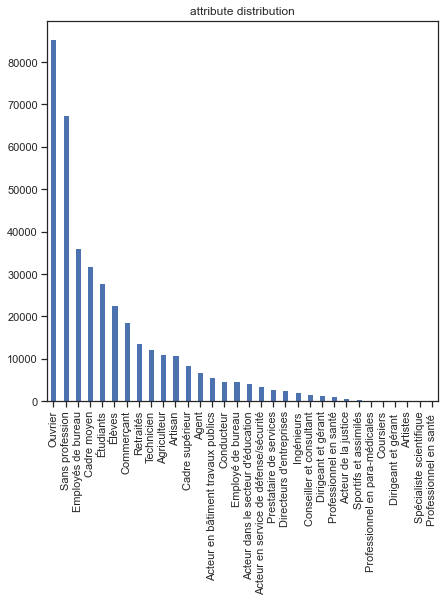

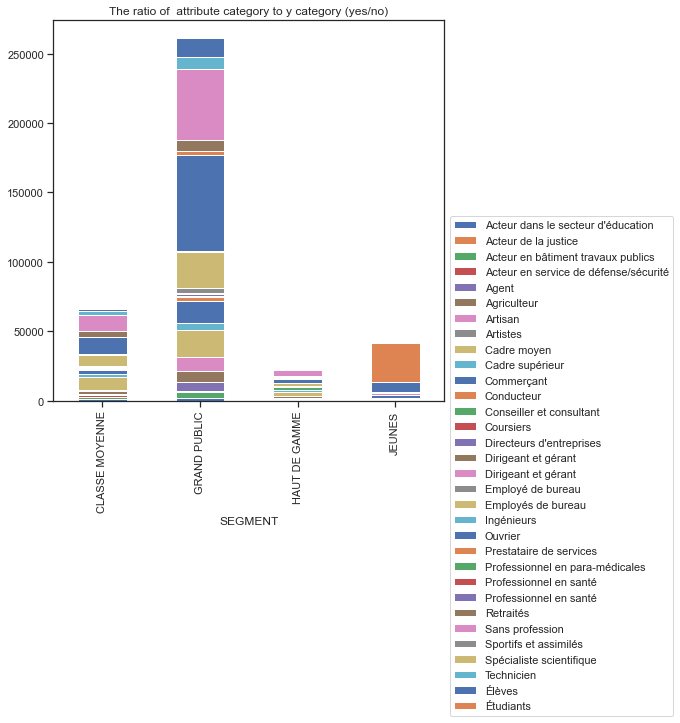

[Each column sums up to 1] 
SEGMENT                                CLASSE MOYENNE  GRAND PUBLIC  \
CLIENT_PROFESSION                                                     
Acteur dans le secteur d'éducation           0.024011      0.008301   
Acteur de la justice                         0.000318      0.000176   
Acteur en bâtiment travaux publics           0.014276      0.015336   
Acteur en service de défense/sécurité        0.025343      0.004123   
Agent                                        0.011809      0.022809   
Agriculteur                                  0.027917      0.031447   
Artisan                                      0.015094      0.037973   
Artistes                                     0.000833      0.000713   
Cadre moyen                                  0.139886      0.074030   
Cadre supérieur                              0.033034      0.018996   
Commerçant                                   0.040876      0.060330   
Conducteur                                   0.01

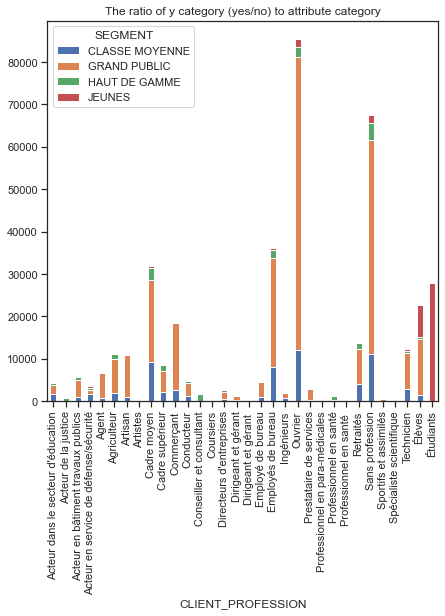

[Each row sums up to 1]
SEGMENT                                CLASSE MOYENNE  GRAND PUBLIC  \
CLIENT_PROFESSION                                                     
Acteur dans le secteur d'éducation           0.366451      0.500462   
Acteur de la justice                         0.031915      0.069909   
Acteur en bâtiment travaux publics           0.164458      0.697942   
Acteur en service de défense/sécurité        0.474759      0.305162   
Agent                                        0.111620      0.851746   
Agriculteur                                  0.165872      0.738149   
Artisan                                      0.090868      0.903117   
Artistes                                     0.204461      0.691450   
Cadre moyen                                  0.289801      0.605884   
Cadre supérieur                              0.252517      0.573660   
Commerçant                                   0.144254      0.841107   
Conducteur                                   0.241691

In [70]:
plot(data.CLIENT_PROFESSION)

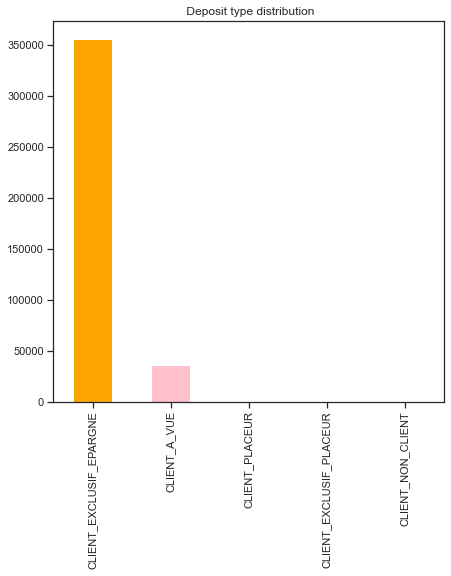

In [71]:
data.CLIENT_TYPE_DEPOSANT.value_counts().plot(kind="bar" , color=['orange', 'pink', 'cyan', 'olive'])
plt.title(" Deposit type distribution")
plt.show()

In [72]:
data['CLIENT_TYPE_DEPOSANT'].value_counts()

CLIENT_EXCLUSIF_EPARGNE    355993
CLIENT_A_VUE                35739
CLIENT_PLACEUR                 47
CLIENT_EXCLUSIF_PLACEUR         7
CLIENT_NON_CLIENT               1
Name: CLIENT_TYPE_DEPOSANT, dtype: int64

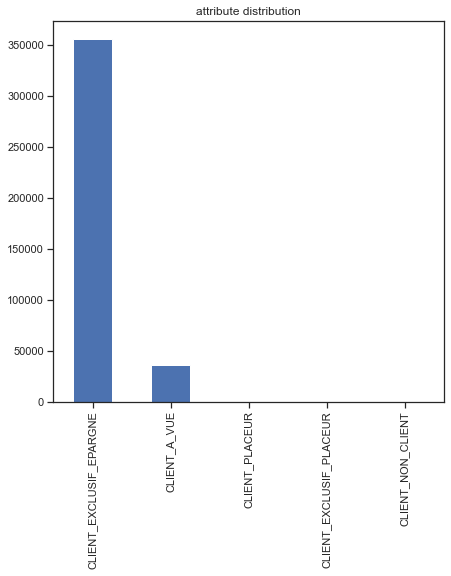

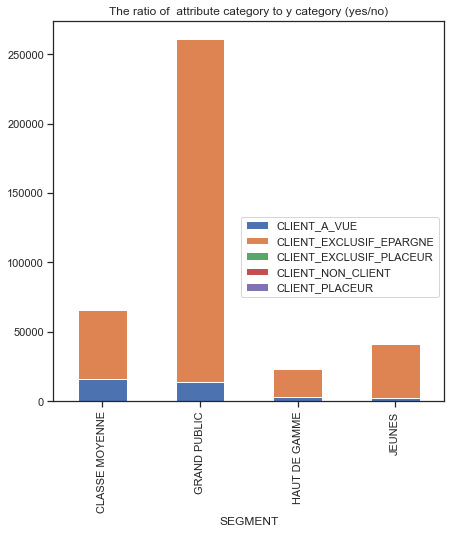

[Each column sums up to 1] 
SEGMENT                  CLASSE MOYENNE  GRAND PUBLIC  HAUT DE GAMME    JEUNES
CLIENT_TYPE_DEPOSANT                                                          
CLIENT_A_VUE                   0.241318      0.053463       0.134780  0.065395
CLIENT_EXCLUSIF_EPARGNE        0.758198      0.946518       0.864617  0.934509
CLIENT_EXCLUSIF_PLACEUR        0.000076      0.000000       0.000086  0.000000
CLIENT_NON_CLIENT              0.000000      0.000004       0.000000  0.000000
CLIENT_PLACEUR                 0.000409      0.000015       0.000517  0.000096






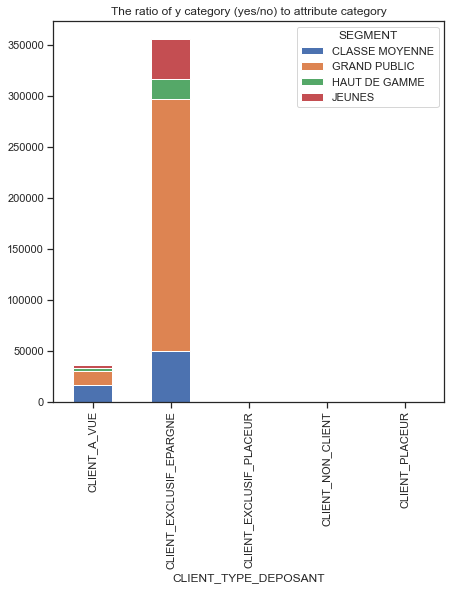

[Each row sums up to 1]
SEGMENT                  CLASSE MOYENNE  GRAND PUBLIC  HAUT DE GAMME    JEUNES
CLIENT_TYPE_DEPOSANT                                                          
CLIENT_A_VUE                   0.446011      0.390358       0.087579  0.076051
CLIENT_EXCLUSIF_EPARGNE        0.140683      0.693809       0.056403  0.109106
CLIENT_EXCLUSIF_PLACEUR        0.714286      0.000000       0.285714  0.000000
CLIENT_NON_CLIENT              0.000000      1.000000       0.000000  0.000000
CLIENT_PLACEUR                 0.574468      0.085106       0.255319  0.085106


In [73]:
plot(data.CLIENT_TYPE_DEPOSANT)

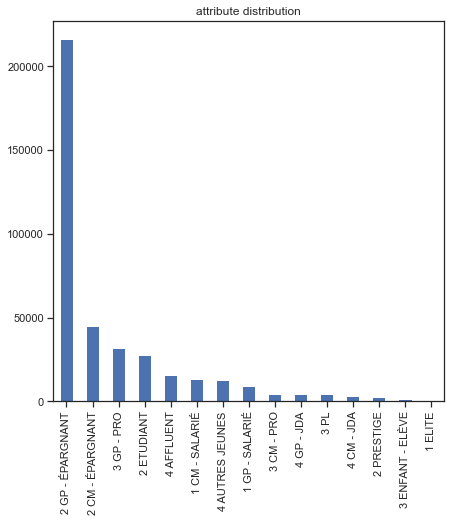

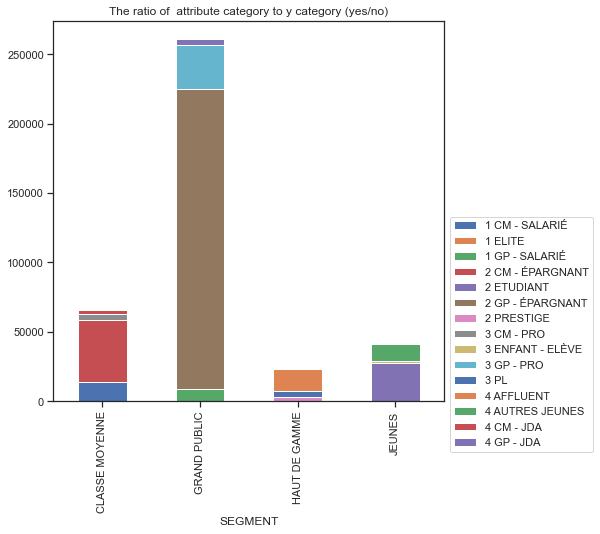

[Each column sums up to 1] 
SEGMENT           CLASSE MOYENNE  GRAND PUBLIC  HAUT DE GAMME    JEUNES
SOUS SEGMENT                                                           
1 CM - SALARIÉ          0.205620      0.000000       0.000000  0.000000
1 ELITE                 0.000000      0.000000       0.008052  0.000000
1 GP - SALARIÉ          0.000000      0.033923       0.000000  0.000000
2 CM - ÉPARGNANT        0.682487      0.000000       0.000000  0.000000
2 ETUDIANT              0.000000      0.000000       0.000000  0.666747
2 GP - ÉPARGNANT        0.000000      0.828747       0.000000  0.000000
2 PRESTIGE              0.000000      0.000000       0.122120  0.000000
3 CM - PRO              0.066219      0.000000       0.000000  0.000000
3 ENFANT - ELÈVE        0.000000      0.000000       0.000000  0.032336
3 GP - PRO              0.000000      0.121067       0.000000  0.000000
3 PL                    0.000000      0.000000       0.181200  0.000000
4 AFFLUENT              0.000000    

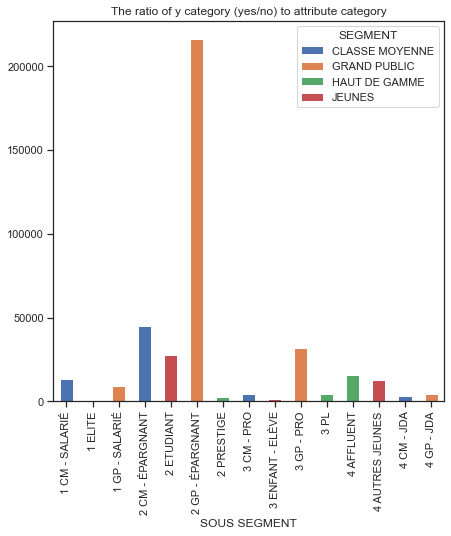

[Each row sums up to 1]
SEGMENT           CLASSE MOYENNE  GRAND PUBLIC  HAUT DE GAMME  JEUNES
SOUS SEGMENT                                                         
1 CM - SALARIÉ               1.0           0.0            0.0     0.0
1 ELITE                      0.0           0.0            1.0     0.0
1 GP - SALARIÉ               0.0           1.0            0.0     0.0
2 CM - ÉPARGNANT             1.0           0.0            0.0     0.0
2 ETUDIANT                   0.0           0.0            0.0     1.0
2 GP - ÉPARGNANT             0.0           1.0            0.0     0.0
2 PRESTIGE                   0.0           0.0            1.0     0.0
3 CM - PRO                   1.0           0.0            0.0     0.0
3 ENFANT - ELÈVE             0.0           0.0            0.0     1.0
3 GP - PRO                   0.0           1.0            0.0     0.0
3 PL                         0.0           0.0            1.0     0.0
4 AFFLUENT                   0.0           0.0            1.0     

In [74]:
plot(data['SOUS SEGMENT'])


<AxesSubplot:>

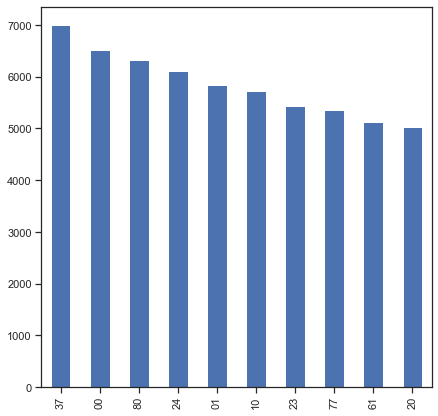

In [75]:
data.AGENCE.value_counts()[:10].plot(kind='bar')

In [76]:
data['AGENCE'].unique()


array(['A1', 'A2', 'A3', 'A4', 'A6', 'A7', 'A8', 'A9', 'B1', 'B2', 'B3',
       'B4', 'B6', 'B7', 'B8', 'B9', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6',
       'C7', 'C8', 'C9', 'D1', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9',
       'K1', 'K2', 'K3', 'K4', 'K5', 'K6', 'K7', 'K8', 'K9', 'L1', 'L2',
       'L3', 'L4', 'L5', 'L6', 'L7', 'L8', 'L9', 'M1', 'M2', 'M3', 'M4',
       'M5', 'M6', 'M7', 'M8', 'M9', 'N1', 'N2', 'N3', 'N4', 'N5', 'N6',
       'N7', 'N8', 'N9', 'P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8',
       'P9', 'R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8', 'R9', 'S1',
       'S2', 'S3', 'S4', 'S5', 'S6', 'S7', 'S8', 'S9', 'T1', 'T2', 'T3',
       'T4', 'T5', 'T6', 'T7', 'T8', 'T9', 'U1', 'U2', 'U3', 'U4', 'U5',
       'U6', 'U7', 'U8', 'U9', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7',
       'V8', 'V9', 'X1', 'X2', '00', '01', '02', '03', '04', '05', '06',
       '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17',
       '18', '19', '20', '21', '22', '23', '24', '2

<AxesSubplot:>

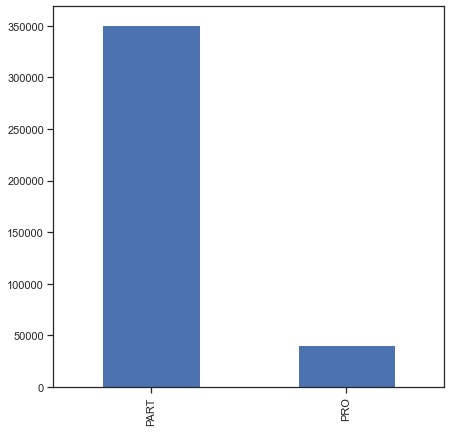

In [77]:
data.MARCHE.value_counts()[:10].plot(kind='bar')


In [78]:
data['MARCHE'].unique()


array(['PART', 'PRO'], dtype=object)

In [79]:
data[data['MARCHE'] == 'PART']

,CLIENT_ID,AGENCE,MARCHE,SEGMENT,SOUS SEGMENT,CLIENT_AGE,CLIENT_ENCOURS_A_VUE,CLIENT_ENCOURS_ENGAGEMENT,CLIENT_MMM,CLIENT_NOMBRE_BIATNET,CLIENT_NOMBRE_CARTES,CLIENT_NOMBRE_MESSAGIS,CLIENT_NOMBRE_FAMILIA,CLIENT_NOMBRE_OPCVM,CLIENT_NOMBRE_PROJET_AVENIR,CLIENT_NOMBRE_TITRES,CLIENT_PROFESSION,CLIENT_REVENUS_MENSUELS_NETS,CLIENT_TYPE_DEPOSANT,CLIENT_VRD_MOY,VALEUR,PACK,TOTAL_PACK
1,98070,A1,PART,CLASSE MOYENNE,1 CM - SALARIÉ,58,0.0,84.396,0.0,0,0,0,0,0,0,0,Directeurs d'entreprises,NaN,CLIENT_A_VUE,0.00000,1,True,1.0
7,60958,A1,PART,CLASSE MOYENNE,1 CM - SALARIÉ,54,0.0,0.000,0.0,0,0,0,0,0,0,0,Cadre moyen,900.0,CLIENT_EXCLUSIF_EPARGNE,766.93525,1,True,1.0
10,708004,A1,PART,CLASSE MOYENNE,1 CM - SALARIÉ,32,0.0,0.000,0.0,0,0,0,0,0,0,0,Cadre moyen,NaN,CLIENT_EXCLUSIF_EPARGNE,4040.74640,1,False,0.0
13,98110,A1,PART,CLASSE MOYENNE,1 CM - SALARIÉ,49,0.0,0.000,0.0,0,0,0,0,0,0,0,Cadre moyen,NaN,CLIENT_A_VUE,290.84965,1,False,0.0
14,98444,A1,PART,CLASSE MOYENNE,1 CM - SALARIÉ,39,0.0,0.000,0.0,0,0,0,0,0,0,0,Acteur dans le secteur d'éducation,1800.0,CLIENT_A_VUE,8232.68285,1,False,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
830896,1307518,NaN,PART,JEUNES,4 AUTRES JEUNES,21,0.0,0.000,0.0,0,0,0,0,0,0,0,Cadre moyen,1000.0,CLIENT_EXCLUSIF_EPARGNE,12.69380,1,False,0.0
830898,1129990,NaN,PART,JEUNES,4 AUTRES JEUNES,22,0.0,0.000,0.0,0,0,0,0,0,0,0,Cadre moyen,NaN,CLIENT_EXCLUSIF_EPARGNE,22.10230,1,False,0.0
830899,1294659,NaN,PART,JEUNES,4 AUTRES JEUNES,20,0.0,0.000,0.0,0,0,0,0,0,0,0,Dirigeant et gérant,3000.0,CLIENT_EXCLUSIF_EPARGNE,108.21460,1,False,0.0
830900,1164442,NaN,PART,JEUNES,4 AUTRES JEUNES,23,0.0,0.001,0.0,0,1,0,0,0,0,0,Employés de bureau,770.0,CLIENT_EXCLUSIF_EPARGNE,0.00225,1,True,1.0


### Data Reduction

In [80]:
#Dropping Agence and marche
data = data.drop(columns= ['AGENCE','MARCHE'])

In [81]:
data['CLIENT_REVENUS_MENSUELS_NETS'].describe()


count    116729.000000
mean        845.395539
std         568.248897
min           0.000000
25%         500.000000
50%         700.000000
75%        1000.000000
max        3900.000000
Name: CLIENT_REVENUS_MENSUELS_NETS, dtype: float64

In [82]:
data = data.drop(columns= ['CLIENT_ENCOURS_A_VUE','CLIENT_NOMBRE_BIATNET','CLIENT_NOMBRE_OPCVM','CLIENT_NOMBRE_TITRES','CLIENT_NOMBRE_PROJET_AVENIR','CLIENT_ID'])

### Features relationship Analysis

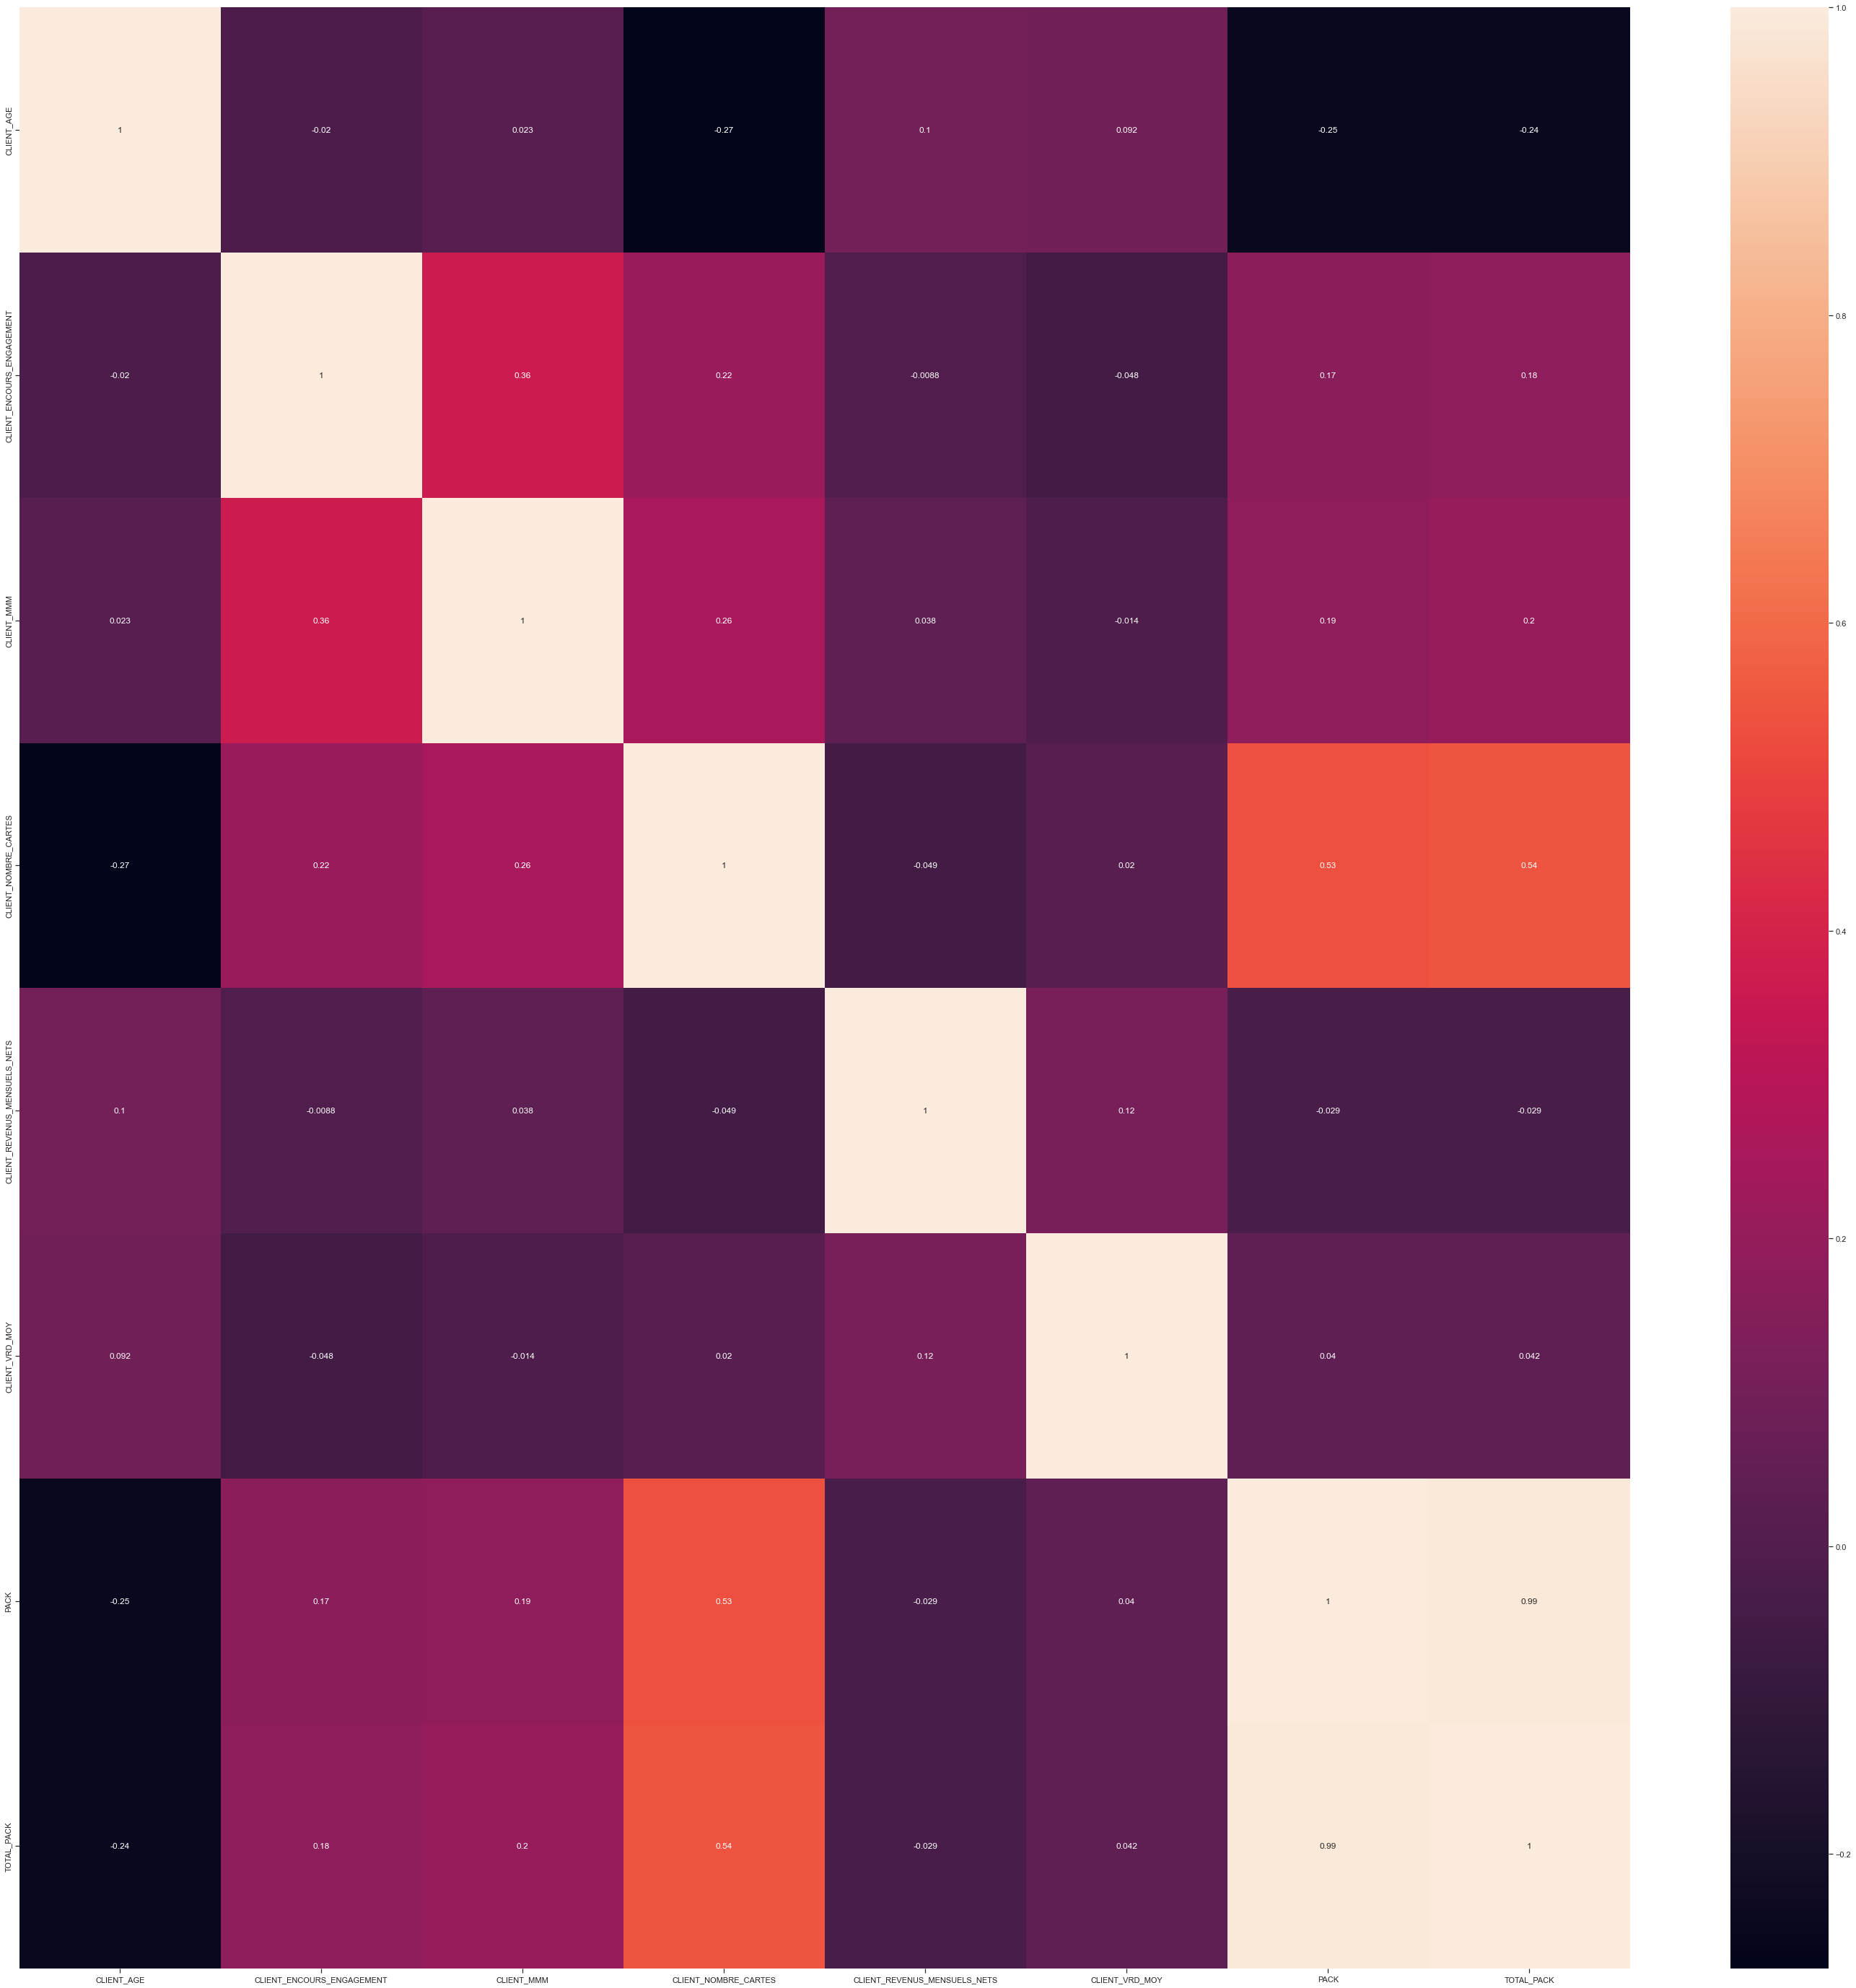

In [83]:
correlation = data.corr()
correlation
plt.figure(figsize=(50,50))
sns.heatmap(correlation, xticklabels=correlation.columns , yticklabels=correlation.columns , annot=True)
plt.savefig('figure1.png')
plt.show()

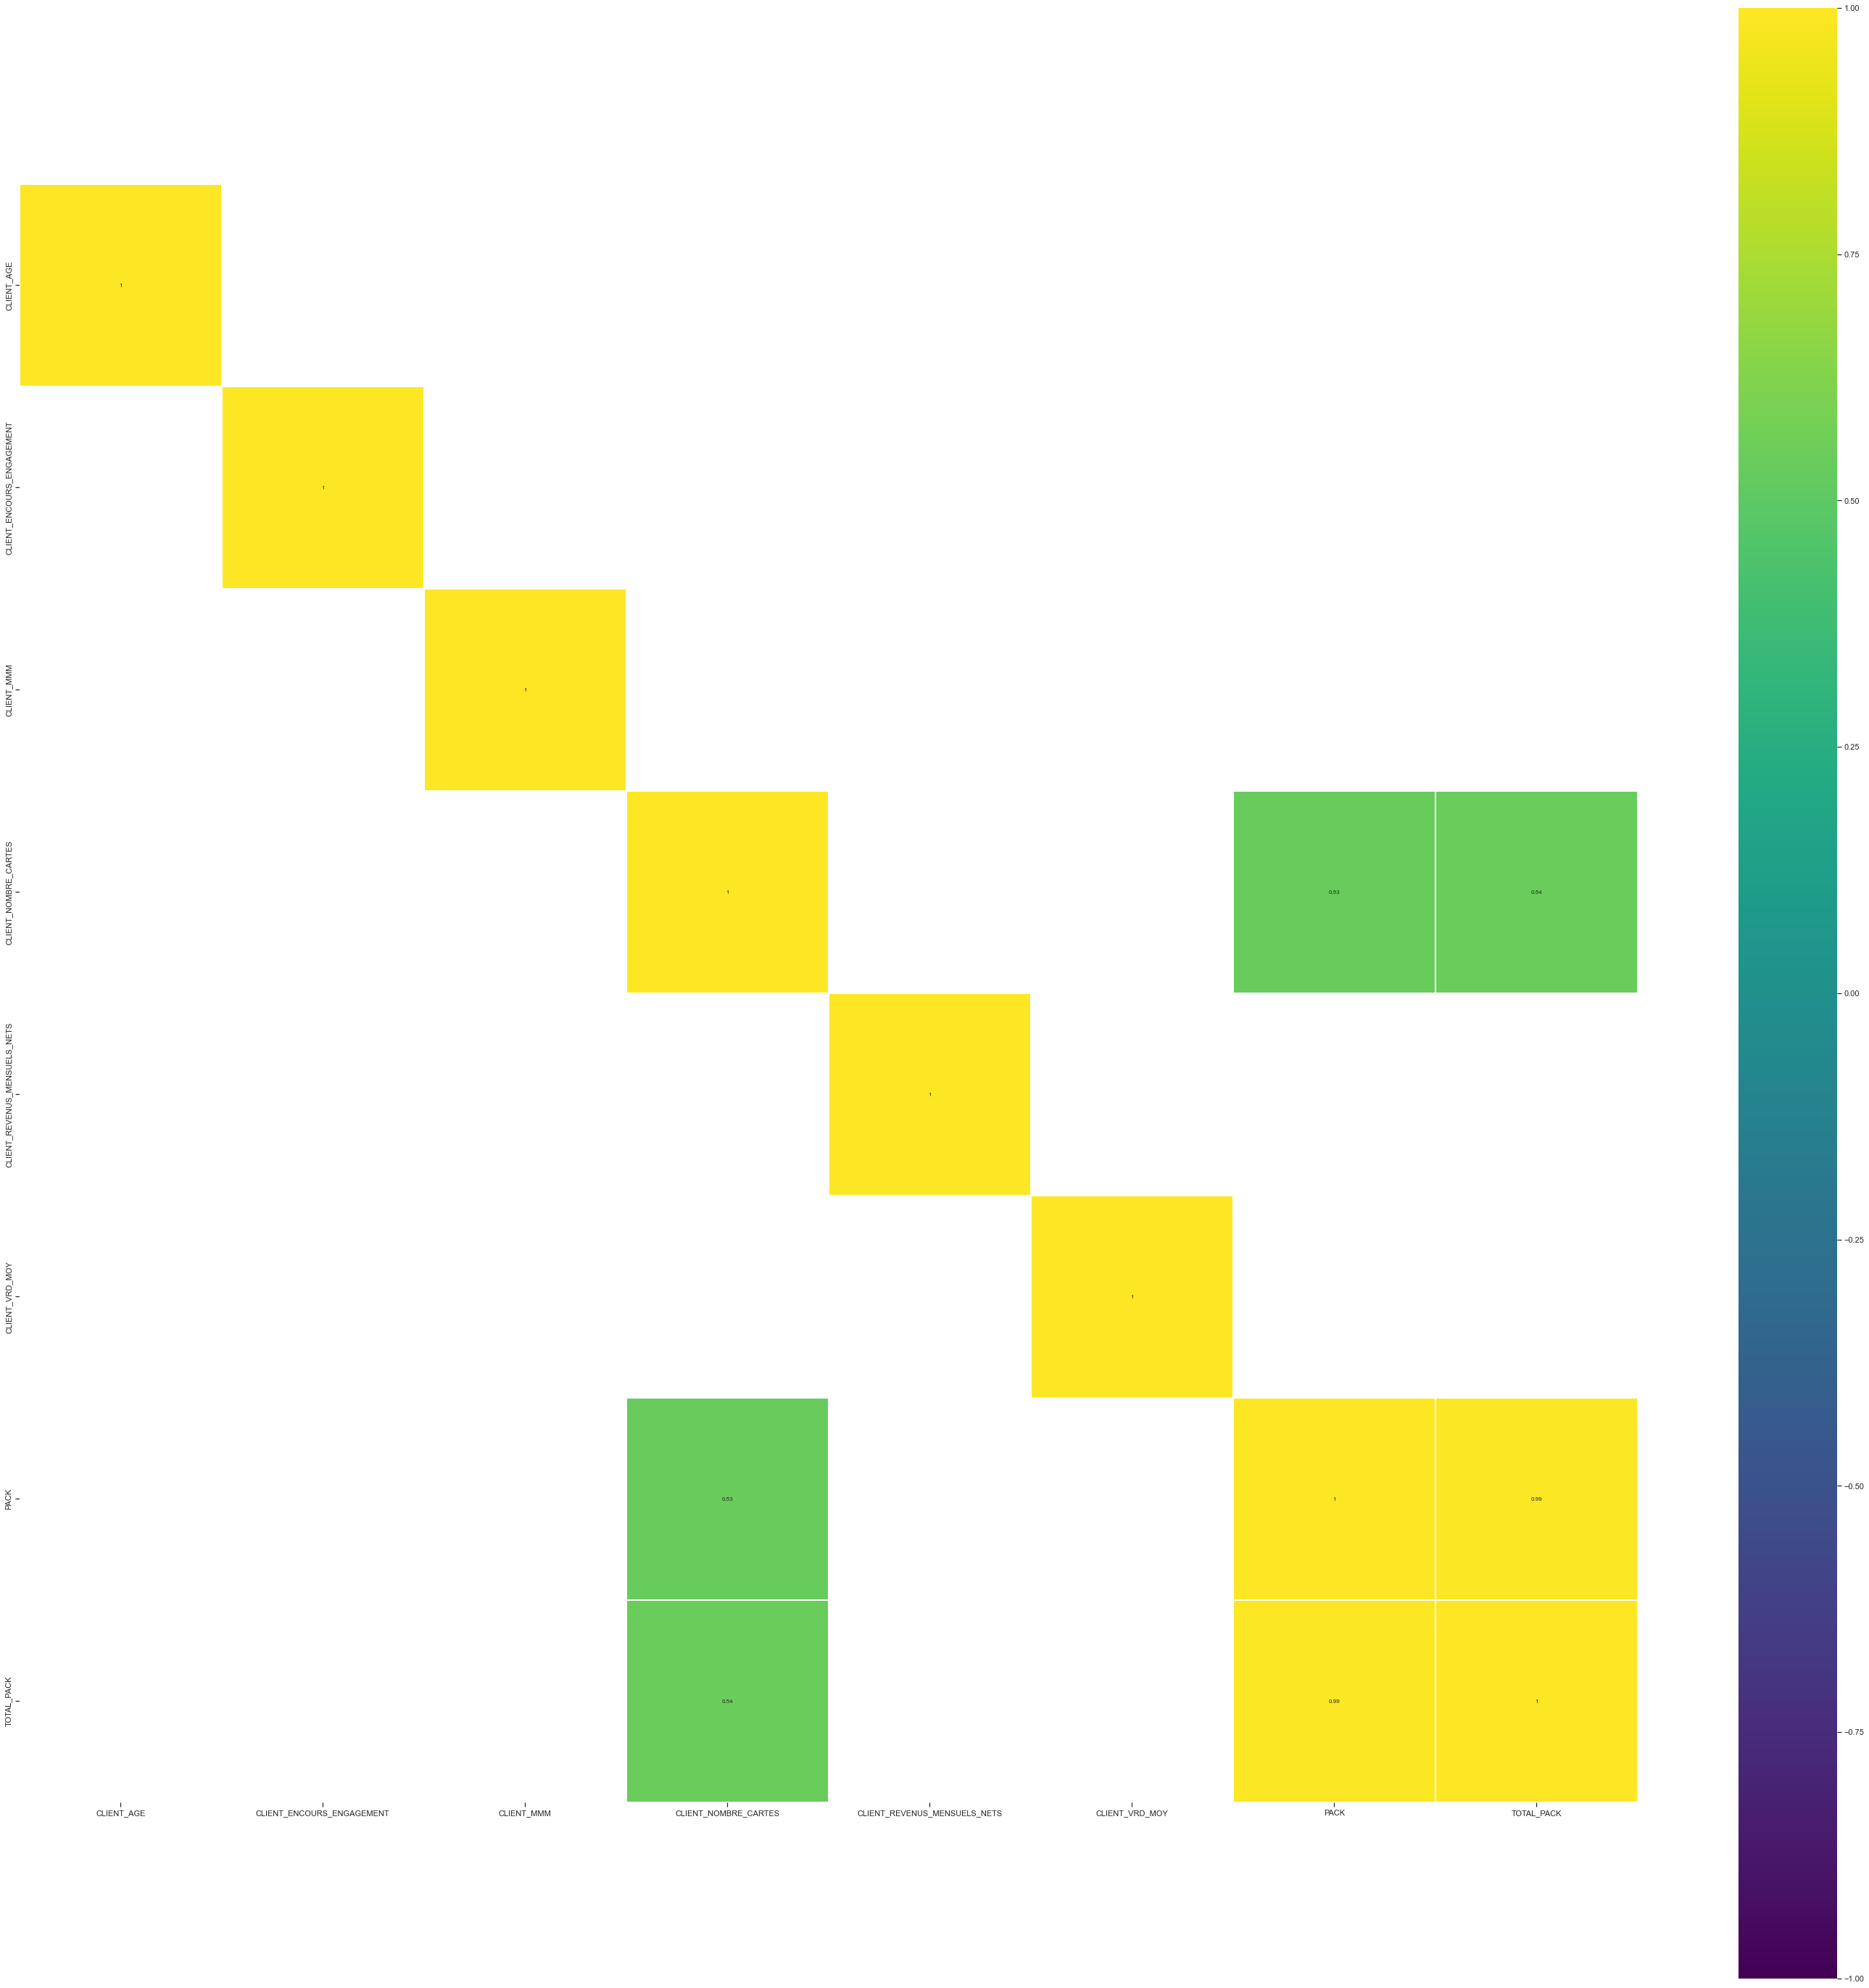

In [84]:
plt.figure(figsize=(50, (50)))

sns.heatmap(correlation[(correlation >= 0.5) | (correlation <= -0.4)],
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

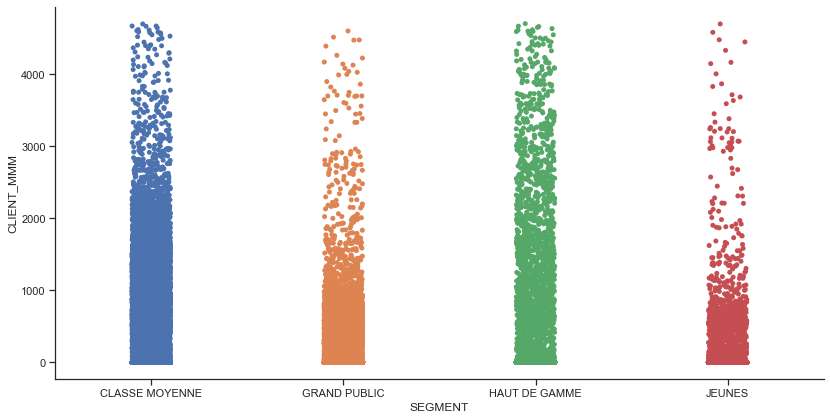

In [85]:
sns.catplot(x="SEGMENT", y="CLIENT_MMM", data=data , height=6, aspect=11.7/6);

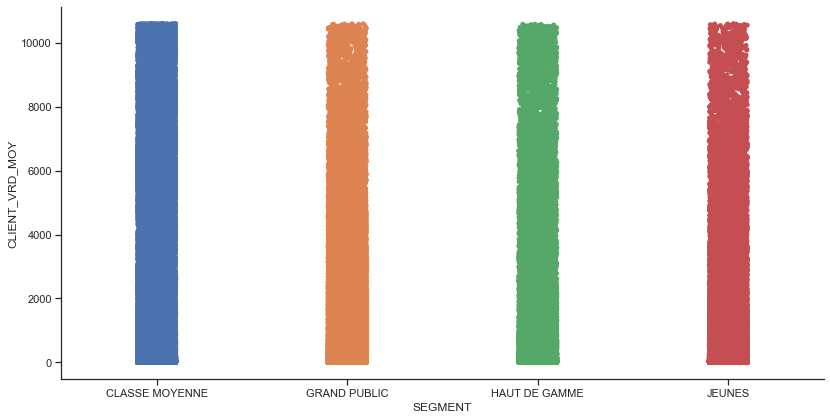

In [86]:
sns.catplot(x="SEGMENT", y="CLIENT_VRD_MOY", data=data , height=6, aspect=11.7/6);

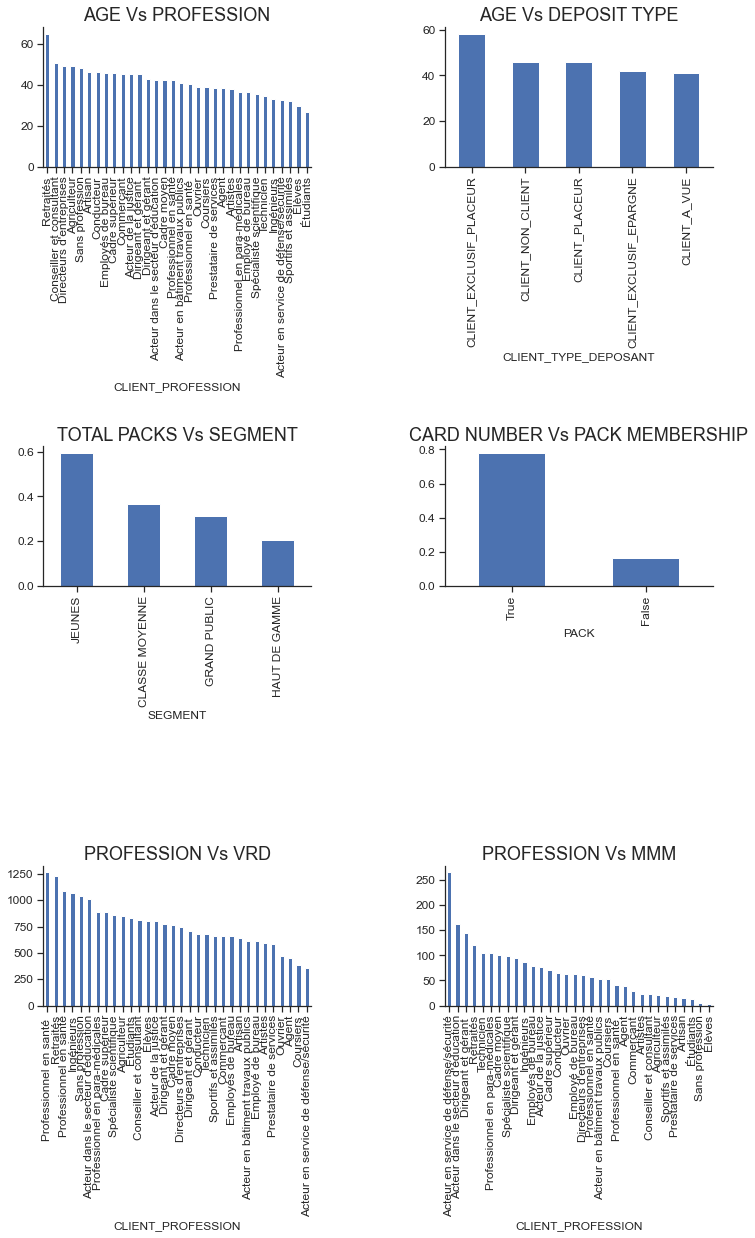

In [87]:
fig, axarr = plt.subplots(3, 2, figsize=(12, 18))
data.groupby('CLIENT_PROFESSION')['CLIENT_AGE'].mean().sort_values(ascending=False).plot.bar(ax=axarr[0][0], fontsize=12)
axarr[0][0].set_title("AGE Vs PROFESSION", fontsize=18)

data.groupby('CLIENT_TYPE_DEPOSANT')['CLIENT_AGE'].mean().sort_values(ascending=False).plot.bar(ax=axarr[0][1], fontsize=12)
axarr[0][1].set_title("AGE Vs DEPOSIT TYPE", fontsize=18)

data.groupby('SEGMENT')['TOTAL_PACK'].mean().sort_values(ascending=False).plot.bar(ax=axarr[1][0], fontsize=12)
axarr[1][0].set_title("TOTAL PACKS Vs SEGMENT", fontsize=18)

data.groupby('PACK')['CLIENT_NOMBRE_CARTES'].mean().sort_values(ascending=False).plot.bar(ax=axarr[1][1], fontsize=12)
axarr[1][1].set_title("CARD NUMBER Vs PACK MEMBERSHIP", fontsize=18)

data.groupby('CLIENT_PROFESSION')['CLIENT_VRD_MOY'].mean().sort_values(ascending=False).plot.bar(ax=axarr[2][0], fontsize=12)
axarr[2][0].set_title("PROFESSION Vs VRD", fontsize=18)

data.groupby('CLIENT_PROFESSION')['CLIENT_MMM'].mean().sort_values(ascending=False).plot.bar(ax=axarr[2][1], fontsize=12)
axarr[2][1].set_title("PROFESSION Vs MMM", fontsize=18)

plt.subplots_adjust(hspace=2.0)
plt.subplots_adjust(wspace=.5)
sns.despine()

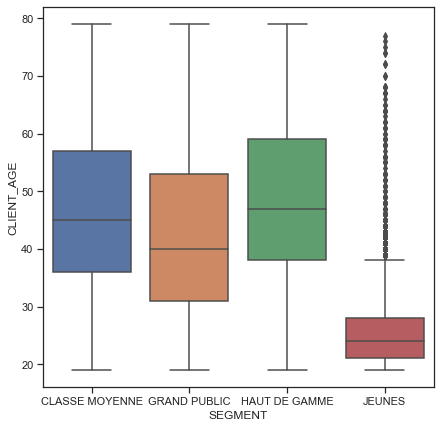

In [88]:
sns.boxplot(x='SEGMENT', y='CLIENT_AGE', data=data)

plt.show()

In [89]:
data['CLIENT_NOMBRE_CARTES'].unique()

array([0, 1, 2, 3, 4])

In [90]:
data['CLIENT_MMM'].describe()

count    391787.000000
mean         52.087298
std         262.655563
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max        4704.003000
Name: CLIENT_MMM, dtype: float64

In [91]:
data.shape

(391787, 15)

In [92]:
data = data.drop(columns= ['SEGMENT','SOUS SEGMENT','CLIENT_NOMBRE_MESSAGIS','CLIENT_NOMBRE_FAMILIA','CLIENT_REVENUS_MENSUELS_NETS','VALEUR'])

In [93]:
data

,CLIENT_AGE,CLIENT_ENCOURS_ENGAGEMENT,CLIENT_MMM,CLIENT_NOMBRE_CARTES,CLIENT_PROFESSION,CLIENT_TYPE_DEPOSANT,CLIENT_VRD_MOY,PACK,TOTAL_PACK
1,58,84.396,0.000,0,Directeurs d'entreprises,CLIENT_A_VUE,0.00000,True,1.0
7,54,0.000,0.000,0,Cadre moyen,CLIENT_EXCLUSIF_EPARGNE,766.93525,True,1.0
10,32,0.000,0.000,0,Cadre moyen,CLIENT_EXCLUSIF_EPARGNE,4040.74640,False,0.0
13,49,0.000,0.000,0,Cadre moyen,CLIENT_A_VUE,290.84965,False,0.0
14,39,0.000,0.000,0,Acteur dans le secteur d'éducation,CLIENT_A_VUE,8232.68285,False,0.0
...,...,...,...,...,...,...,...,...,...
834739,66,0.000,0.000,0,Commerçant,CLIENT_EXCLUSIF_EPARGNE,0.00000,False,0.0
834741,41,31.386,166.666,2,Commerçant,CLIENT_A_VUE,20.38160,True,1.0
834746,33,0.000,0.000,0,Commerçant,CLIENT_EXCLUSIF_EPARGNE,0.02700,False,0.0
834748,39,0.000,0.000,0,Conducteur,CLIENT_EXCLUSIF_EPARGNE,68.23560,False,0.0


# Feature scaling
For instance, Feature Scaling doesn't do much if the scale doesn't matter. For K-Means Clustering, the Euclidean distance is important, so Feature Scaling makes a huge impact.

### Label encoding using OneHotEncoder

In [94]:

one_hot_encoded_data = pd.get_dummies(data, columns = ['CLIENT_PROFESSION', 'CLIENT_TYPE_DEPOSANT','PACK'])
one_hot_encoded_data

,CLIENT_AGE,CLIENT_ENCOURS_ENGAGEMENT,CLIENT_MMM,CLIENT_NOMBRE_CARTES,CLIENT_VRD_MOY,TOTAL_PACK,CLIENT_PROFESSION_Acteur dans le secteur d'éducation,CLIENT_PROFESSION_Acteur de la justice,CLIENT_PROFESSION_Acteur en bâtiment travaux publics,CLIENT_PROFESSION_Acteur en service de défense/sécurité,CLIENT_PROFESSION_Agent,CLIENT_PROFESSION_Agriculteur,CLIENT_PROFESSION_Artisan,CLIENT_PROFESSION_Artistes,CLIENT_PROFESSION_Cadre moyen,CLIENT_PROFESSION_Cadre supérieur,CLIENT_PROFESSION_Commerçant,CLIENT_PROFESSION_Conducteur,CLIENT_PROFESSION_Conseiller et consultant,CLIENT_PROFESSION_Coursiers,CLIENT_PROFESSION_Directeurs d'entreprises,CLIENT_PROFESSION_Dirigeant et gérant,CLIENT_PROFESSION_Dirigeant et gérant,CLIENT_PROFESSION_Employé de bureau,CLIENT_PROFESSION_Employés de bureau,CLIENT_PROFESSION_Ingénieurs,CLIENT_PROFESSION_Ouvrier,CLIENT_PROFESSION_Prestataire de services,CLIENT_PROFESSION_Professionnel en para-médicales,CLIENT_PROFESSION_Professionnel en santé,CLIENT_PROFESSION_Professionnel en santé,CLIENT_PROFESSION_Retraités,CLIENT_PROFESSION_Sans profession,CLIENT_PROFESSION_Sportifs et assimilés,CLIENT_PROFESSION_Spécialiste scientifique,CLIENT_PROFESSION_Technicien,CLIENT_PROFESSION_Élèves,CLIENT_PROFESSION_Étudiants,CLIENT_TYPE_DEPOSANT_CLIENT_A_VUE,CLIENT_TYPE_DEPOSANT_CLIENT_EXCLUSIF_EPARGNE,CLIENT_TYPE_DEPOSANT_CLIENT_EXCLUSIF_PLACEUR,CLIENT_TYPE_DEPOSANT_CLIENT_NON_CLIENT,CLIENT_TYPE_DEPOSANT_CLIENT_PLACEUR,PACK_False,PACK_True
1,58,84.396,0.000,0,0.00000,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
7,54,0.000,0.000,0,766.93525,1.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
10,32,0.000,0.000,0,4040.74640,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
13,49,0.000,0.000,0,290.84965,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
14,39,0.000,0.000,0,8232.68285,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
834739,66,0.000,0.000,0,0.00000,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
834741,41,31.386,166.666,2,20.38160,1.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
834746,33,0.000,0.000,0,0.02700,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
834748,39,0.000,0.000,0,68.23560,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


### Standarize the data
StandardScaler is useful for the features that follow a Normal distribution.Therefore, it makes mean = 0 and scales the data to unit variance.
MinMaxScaler may be used when the upper and lower boundaries are well known from domain knowledge

In [95]:
from sklearn.preprocessing import MinMaxScaler

#Define minmaxscaler
scaler = MinMaxScaler()

#Transform data

scaled = scaler.fit_transform(one_hot_encoded_data)
print(scaled)

[[0.65       0.29890561 0.         ... 0.         0.         1.        ]
 [0.58333333 0.         0.         ... 0.         0.         1.        ]
 [0.21666667 0.         0.         ... 0.         1.         0.        ]
 ...
 [0.23333333 0.         0.         ... 0.         1.         0.        ]
 [0.33333333 0.         0.         ... 0.         1.         0.        ]
 [0.43333333 0.         0.         ... 0.         1.         0.        ]]


In [96]:
from sklearn.decomposition import PCA

pca = PCA()
data_pca = pca.fit(scaled)

pca.explained_variance_ratio_

array([2.99218486e-01, 1.22193737e-01, 9.97156717e-02, 8.28379527e-02,
       5.45852983e-02, 4.84398715e-02, 3.89244917e-02, 3.69628049e-02,
       2.82612958e-02, 2.24373356e-02, 1.83361923e-02, 1.75414865e-02,
       1.70538151e-02, 1.46980979e-02, 1.40960447e-02, 1.13452599e-02,
       9.53088904e-03, 8.05733073e-03, 7.29310626e-03, 7.21012770e-03,
       6.87209742e-03, 5.61763302e-03, 4.66947432e-03, 4.09471214e-03,
       3.35117572e-03, 3.33654920e-03, 2.75437196e-03, 2.22963895e-03,
       2.07067099e-03, 1.11574924e-03, 1.07635402e-03, 9.30158659e-04,
       6.51268149e-04, 5.96787880e-04, 5.10751446e-04, 4.30005832e-04,
       3.19511425e-04, 3.03806888e-04, 2.01691770e-04, 1.11971521e-04,
       1.44034321e-05, 1.92043289e-06, 5.90104415e-32, 3.00765803e-33,
       1.84786117e-33])

In [97]:
pca.explained_variance_ratio_.shape

(45,)

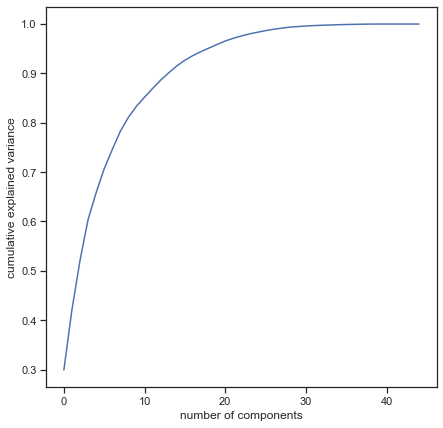

In [98]:
#  plot the cumulative sum of the variability against the number of components.
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [117]:
X= data.iloc[:, [0,6]].values
X

array([[5.80000000e+01, 0.00000000e+00],
       [5.40000000e+01, 7.66935250e+02],
       [3.20000000e+01, 4.04074640e+03],
       ...,
       [3.30000000e+01, 2.70000000e-02],
       [3.90000000e+01, 6.82356000e+01],
       [4.50000000e+01, 1.72458635e+03]])

### K-means Clustering

In [100]:
#Building the Model
#KMeans Algorithm to decide the optimum cluster number , KMeans++ using Elbow Mmethod
#to figure out K for KMeans, I will use ELBOW Method on KMEANS++ Calculation
wcss=[]

#we always assume the max number of cluster would be 10
#you can judge the number of clusters by doing averaging
###Static code to get max no of clusters

for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(scaled)
    wcss.append(kmeans.inertia_)

    #inertia_ is the formula used to segregate the data points into clusters

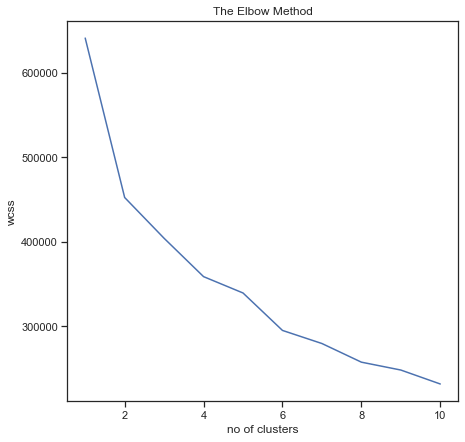

In [101]:
#Visualizing the ELBOW method to get the optimal value of K
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

In [118]:
#For unsupervised learning we use "fit_predict()" wherein for supervised learning we use "fit_tranform()"
#y_kmeans is the final model . Now how and where we will deploy this model in production is depends on what tool we are using.
#This use case is very common and it is used in BFS industry(credit card) and retail for customer segmenattion.

kmeans = KMeans(n_clusters = 4, init='k-means++', random_state=0)
y_kmeans = kmeans.fit_predict(scaled)

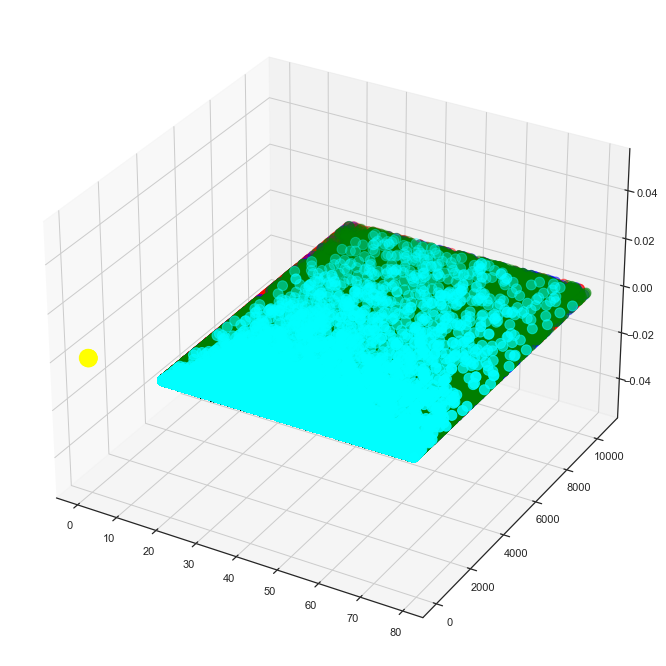

In [119]:
#Visualizing all the clusters

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111 , projection='3d')
ax.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
ax.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
ax.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
ax.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
ax.scatter(X[y_kmeans == 4, 0],X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.show()

In [120]:
#Getting the Centroids
centroids = kmeans.cluster_centers_
u_labels = np.unique(y_kmeans)

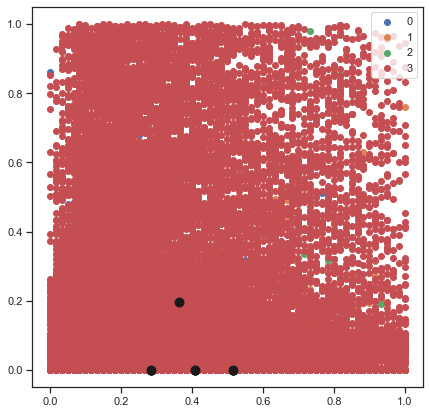

In [122]:
#plotting the results:

for i in u_labels:
    plt.scatter(scaled[y_kmeans == i , 0] , scaled[y_kmeans == i , 1] , label = i)
    plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.legend()
plt.show()

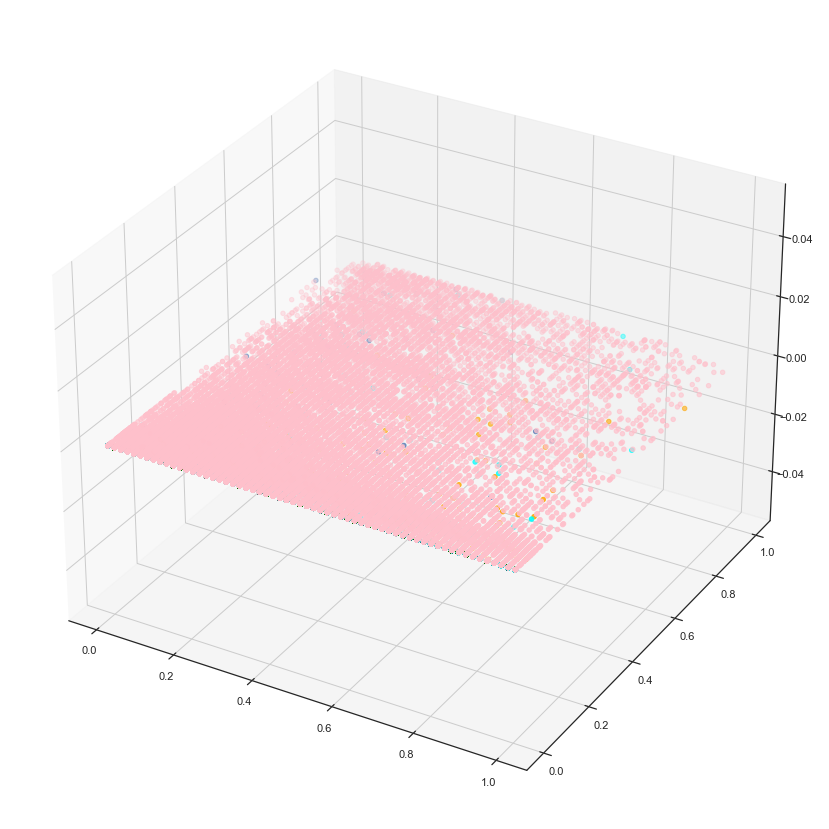

In [123]:
#filter rows of original data
filtered_label0 = scaled[y_kmeans == 0]
filtered_label1 = scaled[y_kmeans == 1]
filtered_label2 = scaled[y_kmeans == 2]
filtered_label3= scaled[y_kmeans == 3]
filtered_label4 = scaled[y_kmeans == 4]

#plotting the results
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(filtered_label0[:,0] , filtered_label0[:,1])
ax.scatter(filtered_label1[:,0] , filtered_label1[:,1] , color = 'orange')
ax.scatter(filtered_label2[:,0] , filtered_label2[:,1] , color = 'cyan')
ax.scatter(filtered_label3[:,0] , filtered_label3[:,1] , color = 'pink')
ax.scatter(filtered_label4[:,0] , filtered_label4[:,1] , color = 'olive')

plt.show()

<AxesSubplot:ylabel='count'>

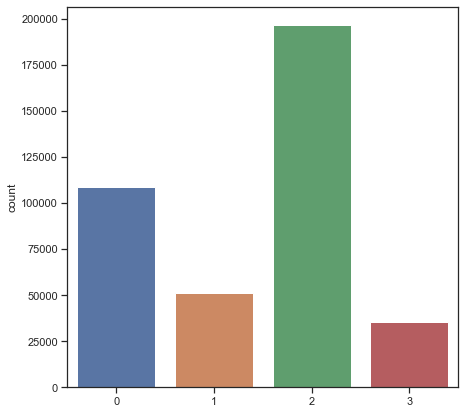

In [124]:
sns.countplot(y_kmeans)


In [127]:
plt.scatter(data[:, 0], scaled[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

TypeError: 'PCA' object is not subscriptable